<br><br>
**Описание работы:**

Cтоит бизнес-задача: на основании имеющихся данных подготовить аналитический отчёт, который в дальнейшем поможет продюсерам образовательных программ эффективно выстраивать стратегию по модернизированию и улучшению курсов. В начале отчёта оформлен ёмкий описательный блок по каждому курсу на основании рассчитанных показателей. Далее — посчитна потенциальная нагрузка на преподавателей, чтобы оценить необходимость расширения штата сотрудников. Затем идёт блок из двух пунктов по анализу качества контента курсов, где необходимо выявить проблемные модули, которые, возможно, требуют доработки. Также стоит задача выявить потенциальную сезонность. Наконец, задание для самостоятельной разработки метрики успеваемости студентов для нахождения тех, кто значительно хуже справляется с прохождением курса.
<br><br>


**Содержание работы:** <br>
[Codebook](#Codebook) <br>
[1. Описание и начальная работа с данными](#1.-Описание-и-начальная-работа-с-данными)<br>
[2. Расчёт потенциальной нагрузки на преподавателей](#2.-Расчет-потенциальной-нагрузки-на-преподавателей)<br>
[3. Выявление проблемных модулей](#3.-Выявление-проблемных-модулей)<br>
[4. Расчёт конверсии](#4.-Расчет-конверсии) <br>
[5. Метрика успеваемости ](#5.-Метрика-успеваемости)

## Codebook

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` — идентификатор курса, <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` — название курса, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` — сфера, к которой относится курс. <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` — идентификатор студента, <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` — город студента, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` — день рождения студента. <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` — идентификатор курса, <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` — номер модуля, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` — название модуля, <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` — номер урока, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` — название урока, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` — токен урока, <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` — наличие видео *(true/false)*, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` — наличие домашней работы *(true/false)*. <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` — идентификатор прогресса, <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` — идентификатор студента, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` — идентификатор курса, <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` — идентификатор прогресса, <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` — номер модуля, <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` — номер урока, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` — статус прохождения урока, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` — дата начала, <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` — дата окончания. <br>
<br><br>

## 1. Описание и начальная работа с данными

Опишем данные: <br>
1. Посчитаем
<ol type="a">
  <li>общее количество курсов в датасете;</li>
  <li>количество модулей на каждом курсе;</li>
  <li>количество уроков в каждом модуле на каждом курсе;</li>
  <li>медианное количество уроков в модуле на каждом курсе;</li>
  <li>количество учеников на каждом курсе;</li>
  <li>минимальный, максимальный, средний, медианный возраст студентов *(чтобы отсечь некорректные значения, в данном случае достаточно установить правдоподобный диапазон на ваше усмотрение)*;</li>
  <li>минимальный, максимальный, средний, медианный возраст студентов на каждом курсе.</li>
</ol>
2. Построим bar-chart, отражающий количество студентов на каждом курсе.
3. Построим горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий количество студентов на каждом курсе.
4. На основании рассчитанных значений опишем данные.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

courses = pd.read_csv('courses.csv')
students = pd.read_csv('students.csv')
course_contents = pd.read_csv('course_contents.csv')
progresses = pd.read_csv('progresses.csv')
progress_phases = pd.read_csv('progress_phases.csv')

students.rename(columns={'id':'student_id'}, inplace=True)
courses.rename(columns={'id':'course_id','title':'course_title'}, inplace=True)
courses.drop('Unnamed: 0', axis=1, inplace=True)
progresses.rename(columns={'id':'progress_id'}, inplace=True)

C:\Users\afanasov\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
<ipython-input-1-586d0fe6fd1c>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [2]:
progresses_common = progress_phases.merge(progresses, how='left', on='progress_id')
courses_common = course_contents.merge(courses, how='left', on='course_id')
courses_and_progresses = courses_common.merge(progresses_common, how='left', on=['module_number', 'lesson_number','course_id'])


In [3]:
courses_and_progresses

course_id  module_number  \
0       04ba6d0b40670c43a209141fa01fa784              1   
1       04ba6d0b40670c43a209141fa01fa784              1   
2       04ba6d0b40670c43a209141fa01fa784              1   
3       04ba6d0b40670c43a209141fa01fa784              1   
4       04ba6d0b40670c43a209141fa01fa784              1   
...                                  ...            ...   
350673  e9bb9205eeed307ee7cbaa08bfd166c3             18   
350674  e9bb9205eeed307ee7cbaa08bfd166c3             18   
350675  e9bb9205eeed307ee7cbaa08bfd166c3             18   
350676  e9bb9205eeed307ee7cbaa08bfd166c3             18   
350677  e9bb9205eeed307ee7cbaa08bfd166c3             18   

                                             module_title  lesson_number  \
0       Введение в Motion Design. Тренды, разновидност...              1   
1       Введение в Motion Design. Тренды, разновидност...              1   
2       Введение в Motion Design. Тренды, разновидност...              1   
3       Введение в Motion Design. Тренды, разновидност...              1   
4       Введение в Motion Design. Тренды, разновидност...              1   
...                                                   ...            ...   
350673                            Экзаменационное задание              1   
350674                            Экзаменационное задание              1   
350675                            Экзаменационное задание              1   
350676                            Экзаменационное задание              1   
350677                            Экзаменационное задание              1   

                  lesson_title                          lesson_token  \
0                   Знакомство  aa344de3-1191-4e69-b485-61823118f71c   
1                   Знакомство  aa344de3-1191-4e69-b485-61823118f71c   
2                   Знакомство  aa344de3-1191-4e69-b485-61823118f71c   
3                   Знакомство  aa344de3-1191-4e69-b485-61823118f71c   
4                   Знакомство  aa344de3-1191-4e69-b485-61823118f71c   
...                        ...                                   ...   
350673  Экзаменационная работа  c2393457-b95e-46ac-b2c7-cd9b7d5f8ba4   
350674  Экзаменационная работа  c2393457-b95e-46ac-b2c7-cd9b7d5f8ba4   
350675  Экзаменационная работа  c2393457-b95e-46ac-b2c7-cd9b7d5f8ba4   
350676  Экзаменационная работа  c2393457-b95e-46ac-b2c7-cd9b7d5f8ba4   
350677  Экзаменационная работа  c2393457-b95e-46ac-b2c7-cd9b7d5f8ba4   

        is_video  is_homework          course_title        field  \
0           True        False  Анимация интерфейсов       Design   
1           True        False  Анимация интерфейсов       Design   
2           True        False  Анимация интерфейсов       Design   
3           True        False  Анимация интерфейсов       Design   
4           True        False  Анимация интерфейсов       Design   
...          ...          ...                   ...          ...   
350673     False         True     JavaScript с нуля  Development   
350674     False         True     JavaScript с нуля  Development   
350675     False         True     JavaScript с нуля  Development   
350676     False         True     JavaScript с нуля  Development   
350677     False         True     JavaScript с нуля  Development   

                             progress_id status  \
0       e4897c239bcf0cbf7b081c8de86eb893  start   
1       81fb8b7412a483355d02d32987aaba6e   done   
2       225784e4b9c1b3dcefc486f1e27f946b   done   
3       c29cf5d7f832d3e82f99a118223eb729   done   
4       b431e4ed2a994d9a8435553c52967ffe   done   
...                                  ...    ...   
350673  065262d4558c46a866de90a5533e710f   done   
350674  789a8cce6d010ba94119d7e9e675c1b0   fail   
350675  867513fe357d522a934d169a4cd47985  start   
350676  193b32f077b9f1c8fbec593e8065afcf   done   
350677  db84e8132b6e9ee73172febc60bd9c54   fail   

                           start_date                    finish_date  \
0       2018-04-03 16:36:54.023829+00     

# Ответы на п. 1.1

## A. Общее количество курсов в датасете - *15*

In [4]:
courses_amount = courses_and_progresses['course_id'].nunique()
courses_amount

15

## B. Количество модулей на каждом курсе.<br>
Больше всего модулей на курсе: *'Анимация интерфейсов'*- **21**, меньше всего: *'PHP-разработчик с 0 до PRO. Часть 1'*- **8**

In [5]:
modules_amount = courses_and_progresses.groupby('course_title').agg({'module_title':['nunique']})
modules_amount_srt = modules_amount.sort_values(('module_title', 'nunique'))
modules_amount_srt

module_title
                                         nunique
course_title                                    
PHP-разработчик с 0 до PRO. Часть 1            8
Веб-вёрстка для начинающих 2.0                 8
Excel Базовый                                  9
Java-разработчик c нуля                        9
SMM-маркетолог от А до Я                      11
Java-разработчик                              17
Веб-дизайн PRO 2.0                            17
Веб-дизайн Базовый                            17
Руководитель digital-проектов                 17
JavaScript с нуля                             18
Интернет-маркетолог от Ingate                 18
Веб-дизайн с нуля 2.0                         19
UX-дизайн                                     20
Веб-разработчик                               20
Анимация интерфейсов                          21

## C. Количество уроков в каждом модуле на каждом курсе.

In [6]:
lessons_amount = courses_and_progresses.groupby(['course_title', 'module_title']).agg({'lesson_title':['nunique']})
lessons_amount

lesson_title
                                                                                      nunique
course_title                  module_title                                                   
Excel Базовый                  Визуализация данных Excel                                    5
                              Основной функционал Excel                                    11
                              Основной функционал Excel (продолжение)                       7
                              Сводные таблицы Excel                                         5
                              Формулы и функции Excel. Более сложные формулы                5
...                                                                                       ...
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                             5
                              Требовательность digital-продюсера                            4
                              Управление временем                                           4
                              Управление дизайнерами. Разработка дизайна по s...            7
                              Экологичный путь менеджера                                    4

[229 rows x 1 columns]

In [7]:
#Ниже представлено количество уроков для каждого модуля в отдельно взятом курсе:
 #Замечание для себя:
  #если хочешь вывести строку c определенным значением из аггрегированого dataframe, то используй метот .reset_index() к dataframe 
res_id_lessons_amount = lessons_amount.reset_index()
  #далее применяй обычный метод доступа к строке с определенным значением в столбце и получишь dataframe ниже:
excel = res_id_lessons_amount[res_id_lessons_amount['course_title'] == 'Excel Базовый']

In [8]:
excel

course_title                                       module_title  \
                                                                      
0  Excel Базовый                          Визуализация данных Excel   
1  Excel Базовый                          Основной функционал Excel   
2  Excel Базовый            Основной функционал Excel (продолжение)   
3  Excel Базовый                              Сводные таблицы Excel   
4  Excel Базовый     Формулы и функции Excel. Более сложные формулы   
5  Excel Базовый                  Формулы и функции Excel. Введение   
6  Excel Базовый  Формулы и функции Excel. Продолжаем работать с...   
7  Excel Базовый  Формулы и функции Excel. Работа с ошибками, пр...   
8  Excel Базовый                            Экзаменационная работа    

  lesson_title  
       nunique  
0            5  
1           11  
2            7  
3            5  
4            5  
5            3  
6            7  
7            5  
8            1

In [11]:
#Здесь сосчитаем уникальное количество уроков для каждого курса:
 #Уберем мультииндекс "nunique"
res_id_lessons_amount.columns = res_id_lessons_amount.columns.droplevel(1)

In [12]:
 #Просуммируем количество уроков в каждом курсе
lessons_count = res_id_lessons_amount.groupby('course_title').agg(
    {'lesson_title':['sum']}).sort_values(('lesson_title', 'sum'))

In [13]:
lessons_count

lesson_title
                                             sum
course_title                                    
Веб-разработчик                               35
PHP-разработчик с 0 до PRO. Часть 1           41
Excel Базовый                                 49
Веб-вёрстка для начинающих 2.0                55
Веб-дизайн Базовый                            59
SMM-маркетолог от А до Я                      62
Анимация интерфейсов                          63
Веб-дизайн PRO 2.0                            67
UX-дизайн                                     73
Веб-дизайн с нуля 2.0                         82
Руководитель digital-проектов                 96
Java-разработчик c нуля                      105
Java-разработчик                             114
JavaScript с нуля                            119
Интернет-маркетолог от Ingate                171

## D. Медианное количество уроков в модуле на каждом курсе.

In [14]:
median_lessons_amount = lessons_amount.groupby(['course_title']).median()
median_lessons_amount_srt = median_lessons_amount.sort_values(('lesson_title', 'nunique'))
median_lessons_amount_srt

lesson_title
                                         nunique
course_title                                    
Веб-разработчик                              2.0
Анимация интерфейсов                         3.0
Веб-дизайн Базовый                           3.0
UX-дизайн                                    3.5
PHP-разработчик с 0 до PRO. Часть 1          4.0
Веб-дизайн с нуля 2.0                        4.0
Excel Базовый                                5.0
Веб-дизайн PRO 2.0                           5.0
Руководитель digital-проектов                5.0
SMM-маркетолог от А до Я                     6.0
Интернет-маркетолог от Ingate                6.5
Java-разработчик                             7.0
JavaScript с нуля                            7.0
Веб-вёрстка для начинающих 2.0               7.0
Java-разработчик c нуля                     10.0

## E. Количество учеников на каждом курсе.<br>
Больше количество учеников на курсе *'Интернет-маркетолог от Ingate'*- **2168**, меньшее *'SMM-маркетолог от А до Я'*- **506**

In [15]:
students_amount = courses_and_progresses.groupby(['course_title']).agg({'student_id':['nunique']})
students_amount_srt = students_amount.sort_values(('student_id', 'nunique'))
students_amount_srt

student_id
                                       nunique
course_title                                  
SMM-маркетолог от А до Я                   506
Веб-дизайн Базовый                         518
Java-разработчик c нуля                    581
Анимация интерфейсов                       598
Веб-разработчик                            628
Руководитель digital-проектов              685
Java-разработчик                           763
Excel Базовый                              782
PHP-разработчик с 0 до PRO. Часть 1        854
JavaScript с нуля                          966
UX-дизайн                                 1151
Веб-дизайн PRO 2.0                        1711
Веб-вёрстка для начинающих 2.0            2004
Веб-дизайн с нуля 2.0                     2014
Интернет-маркетолог от Ingate             2168

## F. Минимальный, максимальный, средний, медианный возраст студентов.<br>
Возраст студентов: минимальный: 17, максимальный: 65, средний: ~28,95, медианный: 28.

In [16]:
# Чистим данные из students
students_id_brth = students.drop(['id_', 'city'], axis=1)
students_id_brth.dropna(inplace=True)
students_id_brth.reset_index(drop=True)

student_id    birthday
0      6c3e52be632fc50de9640147e4017dcd  1979-10-23
1      35a36d90b745992b59085c8d54a072e7  1991-08-15
2      37e8e8179295ae764524223086b0b568  1987-08-24
3      fb10649db552c5f451bea45ed754d428  1988-07-16
4      d15a188c90bb4d83957ac14de78fada4  1991-01-16
...                                 ...         ...
25494  75e54bba2c6a49602ae0547e1f990d21  1993-02-16
25495  afbc1ca2ed9ff60239c5d95e0df23856  1994-04-24
25496  a65ccacbe0226b345f195d02e676aa04  2000-11-21
25497  148f1375e4135e779053a0d4b2a63857  1999-10-20
25498  9ff58c490f6ee5b013e7f62140ee3d79  1998-04-18

[25499 rows x 2 columns]

In [17]:
# Добавдяем колонку начала занятий на курсах и названия курсов
students_age = students_id_brth.merge(progresses_common, how='left', on='student_id')
students_age = students_age.merge(courses, how='left', on='course_id')
students_age.drop(students_age.columns[[2,3,4,5,7,8,10]], axis= 1, inplace= True)
students_age.dropna(inplace=True)
students_age['start_date'] = students_age['start_date'].str[0:10]

In [18]:
# Находим возраст студентов на начало курсов
students_age['birthday'] = pd.to_datetime(students_age['birthday'], errors = 'coerce')
students_age['start_date'] = pd.to_datetime(students_age['start_date'], errors = 'coerce')
students_age.dropna(inplace=True)
students_age["students_age"] = (students_age["start_date"].dt.year - students_age["birthday"].dt.year)

In [19]:
# Задаем разумные границы для возраста
students_age = students_age[(students_age.students_age > 16) & (students_age.students_age < 70)]

In [20]:
#F Минимальный, максимальный, средний, медианный возраст студентов:
students_min_age = students_age['students_age'].min() #17
students_max_age = students_age['students_age'].max() #65
students_mean_age = students_age['students_age'].mean() #28.95306567376234
students_median_age = students_age['students_age'].median() #28

## G. Минимальный, максимальный, средний, медианный возраст студентов на каждом курсе.

In [21]:
studs_crs_min_age = students_age.groupby(['course_title'])['students_age'].min().sort_values()
studs_crs_min_age

course_title
Excel Базовый                          17
Java-разработчик                       17
Java-разработчик c нуля                17
JavaScript с нуля                      17
PHP-разработчик с 0 до PRO. Часть 1    17
SMM-маркетолог от А до Я               17
UX-дизайн                              17
Веб-вёрстка для начинающих 2.0         17
Веб-дизайн PRO 2.0                     17
Веб-дизайн Базовый                     17
Веб-дизайн с нуля 2.0                  17
Веб-разработчик                        17
Интернет-маркетолог от Ingate          17
Анимация интерфейсов                   18
Руководитель digital-проектов          18
Name: students_age, dtype: int32

In [22]:
studs_crs_max_age = students_age.groupby(['course_title'])['students_age'].max().sort_values()
studs_crs_max_age

course_title
Анимация интерфейсов                   50
Веб-дизайн Базовый                     50
Веб-разработчик                        50
SMM-маркетолог от А до Я               51
Java-разработчик c нуля                54
Руководитель digital-проектов          54
UX-дизайн                              57
JavaScript с нуля                      58
Веб-дизайн PRO 2.0                     58
Веб-дизайн с нуля 2.0                  58
Веб-вёрстка для начинающих 2.0         59
Интернет-маркетолог от Ingate          59
Excel Базовый                          60
Java-разработчик                       63
PHP-разработчик с 0 до PRO. Часть 1    65
Name: students_age, dtype: int32

In [23]:
studs_crs_mean_age = students_age.groupby(['course_title'])['students_age'].mean().sort_values()
studs_crs_mean_age

course_title
Веб-разработчик                        26.419021
Веб-дизайн Базовый                     27.325977
Веб-дизайн с нуля 2.0                  27.400850
Веб-дизайн PRO 2.0                     27.811696
JavaScript с нуля                      27.929171
Веб-вёрстка для начинающих 2.0         27.947428
SMM-маркетолог от А до Я               28.270505
Анимация интерфейсов                   28.877157
UX-дизайн                              29.161623
Java-разработчик                       29.182425
Java-разработчик c нуля                29.861952
PHP-разработчик с 0 до PRO. Часть 1    29.926184
Интернет-маркетолог от Ingate          30.469435
Руководитель digital-проектов          30.814524
Excel Базовый                          32.420368
Name: students_age, dtype: float64

In [24]:
studs_crs_median_age = students_age.groupby(['course_title'])['students_age'].median().sort_values()
studs_crs_median_age

course_title
Веб-дизайн PRO 2.0                     26.0
Веб-дизайн с нуля 2.0                  26.0
Веб-разработчик                        26.0
JavaScript с нуля                      27.0
Веб-вёрстка для начинающих 2.0         27.0
Веб-дизайн Базовый                     27.0
Java-разработчик                       28.0
SMM-маркетолог от А до Я               28.0
Анимация интерфейсов                   28.0
Java-разработчик c нуля                29.0
PHP-разработчик с 0 до PRO. Часть 1    29.0
UX-дизайн                              29.0
Интернет-маркетолог от Ingate          29.0
Руководитель digital-проектов          30.0
Excel Базовый                          32.0
Name: students_age, dtype: float64

# Ответы на п. 1.2<br>
Построим bar-chart, отражающий количество студентов на каждом курсе.

In [25]:
# подготовка данных для графика
data = courses_and_progresses.groupby(['course_title']).agg({'student_id':'nunique'}).sort_values('student_id').reset_index()

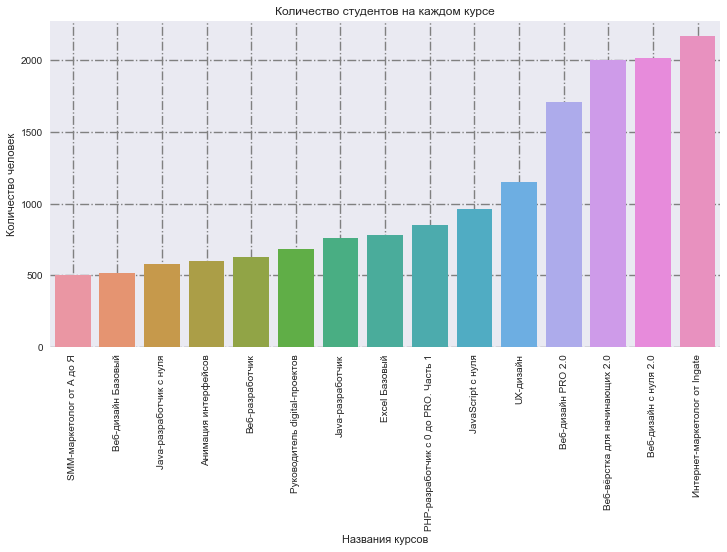

In [26]:
fig, ax = plt.subplots(figsize=(12, 6))
#plotting the barplot
sns.barplot(data=data, x='course_title' , y='student_id', ax=ax)
#rotating x-axes values for better viz
plt.xticks(rotation = 90)
#labeling
plt.title('Количество студентов на каждом курсе')
plt.xlabel('Названия курсов')
plt.ylabel('Количество человек')
#showing grid
plt.grid(True, color="grey", linewidth="1.4", linestyle="-.")

# Ответы на п. 1.3<br>
Построим горизонтальный bar-chart, отражающий количество студентов на каждом курсе.

In [27]:
df = courses_and_progresses.groupby(['course_title', 'field']).agg(
    {'student_id':'nunique'}).sort_values('student_id').reset_index()
median = students_amount[('student_id', 'nunique')].median()

In [28]:
median 

782.0

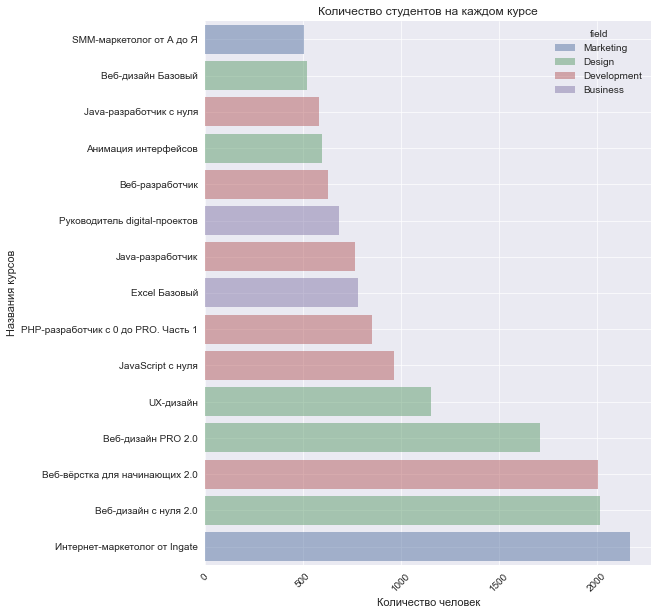

In [29]:

fig, ax = plt.subplots(figsize=(8, 10))
kwargs = {'alpha':0.5}

sns.barplot(data=df, x='student_id', y='course_title',  hue='field', ax=ax, dodge=False, **kwargs)

plt.xticks(rotation = 45)

plt.title('Количество студентов на каждом курсе')
plt.xlabel('Количество человек')
plt.ylabel('Названия курсов')
#plt.axvline(x=median_am, c="orange", ls="--")


plt.grid(True, color="white", linewidth="0.7")

In [30]:
df

course_title        field  student_id
0              SMM-маркетолог от А до Я    Marketing         506
1                    Веб-дизайн Базовый       Design         518
2               Java-разработчик c нуля  Development         581
3                  Анимация интерфейсов       Design         598
4                       Веб-разработчик  Development         628
5         Руководитель digital-проектов     Business         685
6                      Java-разработчик  Development         763
7                         Excel Базовый     Business         782
8   PHP-разработчик с 0 до PRO. Часть 1  Development         854
9                     JavaScript с нуля  Development         966
10                            UX-дизайн       Design        1151
11                   Веб-дизайн PRO 2.0       Design        1711
12       Веб-вёрстка для начинающих 2.0  Development        2004
13                Веб-дизайн с нуля 2.0       Design        2014
14        Интернет-маркетолог от Ingate    Marketing        2168

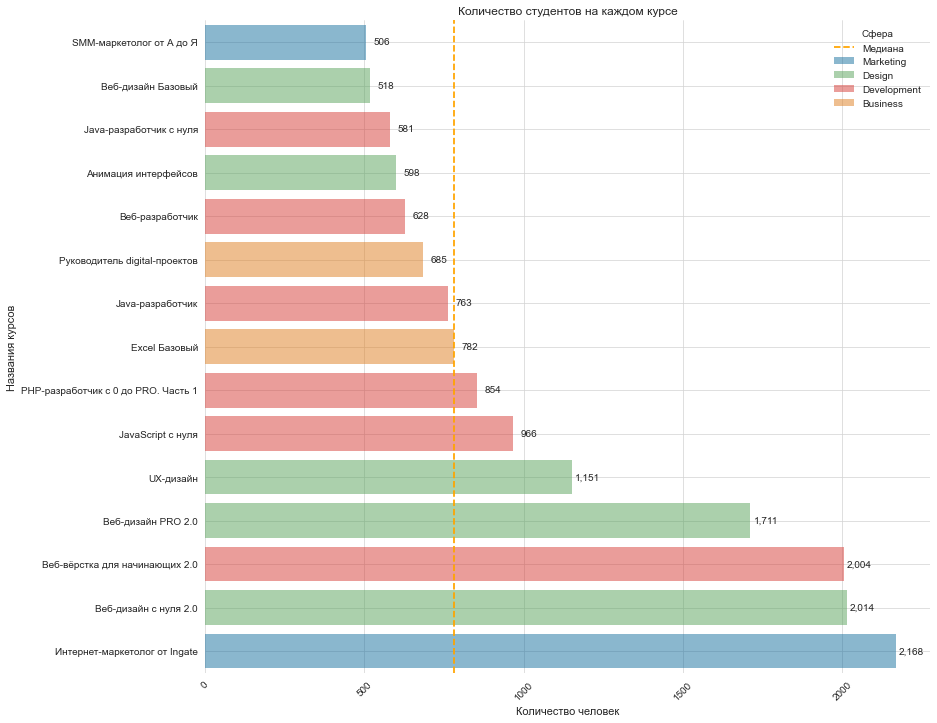

In [31]:
# Цвета для разных сфер
colors = {"Marketing": "#0077b6", "Business": "#ff7f00", "Design": "#4caf50", "Development": "#f1241c"}

# Настройка графика
fig, ax = plt.subplots(figsize=(13, 12))

# Настройка цветов
kwargs = {"alpha": 0.5, "palette": colors}

# Построение графика с помощью seaborn
sns.barplot(
    data=df,
    x="student_id",
    y="course_title",
    hue="field",
    ax=ax,
    dodge=False,
    **kwargs,
)

# Поворот меток оси X
plt.xticks(rotation=45)

# Название графика
plt.title("Количество студентов на каждом курсе")

# Подписи осей
plt.xlabel("Количество человек")
plt.ylabel("Названия курсов")

# Линия медианы
plt.axvline(x=median, c="orange", ls="--", label="Медиана")

# Легенда
plt.legend(loc="best", title="Сфера")

# Сетка
plt.grid(True, color="lightgray", linewidth="0.7")

# Убираем рамку
plt.box(False)

# Создаем список учеников по курсам из Series
value_list = df["student_id"].tolist()
# Добавление подписей к столбцам
for y, x in enumerate(value_list):

    # Получаем значение из DataFrame
    value = df.loc[y, "student_id"]

    # Добавляем текст
    ax.text(x+50, y, f"{value:,}", ha="center", va="center", fontsize=10)

# Показываем график
plt.show()

### Описание данных
Общее количество курсов в датасете 15

Меньше всего модулей на курсах: *PHP-разработчик с 0 до PRO. Часть 1*, *Веб-вёрстка для начинающих 2.0*, *Excel Базовый*, *Java-разработчик c нуля*.
Больше всего модулей на курсах: *Веб-дизайн с нуля 2.0*, *UX-дизайн*, *Веб-разработчик*, *Анимация интерфейсов*

Прослеживается связь, что меньшее количество модулей на курсах для новичков
При этом в абсолютных значениях наибольшее количество уникальных уроков на всех курсах по Java и с полным отрывом идет курс *Интернет-маркетолог от Ingate*, а самое меньшее количество уроков на курсе *Веб-разработчик* с почти самым большим количесвом модулей

Однако на курсах с самым большим кличеством модулей самое низкое медианное число уроков, что модет говорить либо о низкой наполненности этих модулей либо об излищнему разделению уроков на модули
Курс *Java-разработчик c нуля* имеет самое высокое медианное число уроков при одном из самых низких количествах модулей

Наиболее популярными являются 3 из 4 курсов по ВЕБ-тематике и *Интернет-маркетолог от Ingate*

Минимальный возраст на всех курсах практически одинаковый: 17-18 лет
Максимальный возраст, при верхней границе фильтра в 70 лет, в границах 50-65 лет
Медианный и средний возраст около 30 лет

больше всего студентов на курсе *Интернет-маркетолого от Ingate*
меньше всего на курсе *'SMM-маркетолог от А до Я'*
больше всего представлено курсов в поле Девелопмент затем идет Дизайн, Маркетинг и Бизнес делят последнее место
стоит отметить, что в топ-5 три курса свзязнные с веб-сферой
медианное кол-во студентов на каждом курсе: 782 чел.

## 2. Расчет потенциальной нагрузки на преподавателей

1. Рассчитаем количество студентов в каждом месяце для каждого курса, которые начинали выполнение первой домашней работы в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 года до июля 2019 года включительно). При этом расчёт идёт по первой домашней работе по программе курса (не просто по любой работе, которую конкретный студент начал первой). 
2. На основании первого пункта построим line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. 
3. На основании первого пункта построим line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике.
4. Рассчитаем количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 года до июля 2019 года включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие ДЗ надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих ДЗ).  Если у нас нет финишной даты, то мы можем либо учесть эту работу как нагрузку только в самом первом месяце, либо как нагрузку во всех месяцах с начала выполнения работы до даты, когда был выгружен датафрейм (последняя встречающаяся дата в дф). Таким образом, нам для каждого месяца по каждому курсу нужно посчитать количество домашних работ, которые пришлось проверять преподавателям.
5. Построим line-graph по четвёртому пункту. 15 графиков.
6. Построим один line-graph для всех курсов по четвёртому пункту. 15 линий на графике.
7. На основании рассчитанных значений сделаем аналитический вывод.

In [32]:
#Оставляем только те строки, где есть домашка
home_work = courses_and_progresses.loc[(courses_and_progresses['is_homework'] == True)]

In [33]:
#Группируем по курсу, номеру модуля, где домашняя работа была появилась впервые
home_work_first = home_work.groupby('course_title').agg({'module_number':'first', 'lesson_number':'first'}).reset_index()
home_work_first

course_title  module_number  lesson_number
0                         Excel Базовый              1             11
1                      Java-разработчик              1              8
2               Java-разработчик c нуля              1              7
3                     JavaScript с нуля              1              7
4   PHP-разработчик с 0 до PRO. Часть 1              1              5
5              SMM-маркетолог от А до Я              1              6
6                             UX-дизайн              1              8
7                  Анимация интерфейсов              1              3
8        Веб-вёрстка для начинающих 2.0              1              6
9                    Веб-дизайн PRO 2.0              1              6
10                   Веб-дизайн Базовый              3              2
11                Веб-дизайн с нуля 2.0              1              9
12                      Веб-разработчик              1              2
13        Интернет-маркетолог от Ingate              1              7
14        Руководитель digital-проектов              1              4

In [34]:
hw_first_base = home_work_first.merge(
    courses_and_progresses, how='left', on=['course_title', 'module_number', 'lesson_number'])


In [35]:
hw_first_base

course_title  module_number  lesson_number  \
0                      Excel Базовый              1             11   
1                      Excel Базовый              1             11   
2                      Excel Базовый              1             11   
3                      Excel Базовый              1             11   
4                      Excel Базовый              1             11   
...                              ...            ...            ...   
10802  Руководитель digital-проектов              1              4   
10803  Руководитель digital-проектов              1              4   
10804  Руководитель digital-проектов              1              4   
10805  Руководитель digital-проектов              1              4   
10806  Руководитель digital-проектов              1              4   

                              course_id                module_title  \
0      ac634845fb0350d0e9d49078aaa4b68f   Основной функционал Excel   
1      ac634845fb0350d0e9d49078aaa4b68f   Основной функционал Excel   
2      ac634845fb0350d0e9d49078aaa4b68f   Основной функционал Excel   
3      ac634845fb0350d0e9d49078aaa4b68f   Основной функционал Excel   
4      ac634845fb0350d0e9d49078aaa4b68f   Основной функционал Excel   
...                                 ...                         ...   
10802  0770b1b039964228294f1f34b29fc2c1  Экологичный путь менеджера   
10803  0770b1b039964228294f1f34b29fc2c1  Экологичный путь менеджера   
10804  0770b1b039964228294f1f34b29fc2c1  Экологичный путь менеджера   
10805  0770b1b039964228294f1f34b29fc2c1  Экологичный путь менеджера   
10806  0770b1b039964228294f1f34b29fc2c1  Экологичный путь менеджера   

          lesson_title                          lesson_token  is_video  \
0      Домашняя работа  3f8ddbc4-7252-4ed8-92eb-337030ea8f45     False   
1      Домашняя работа  3f8ddbc4-7252-4ed8-92eb-337030ea8f45     False   
2      Домашняя работа  3f8ddbc4-7252-4ed8-92eb-337030ea8f45     False   
3      Домашняя работа  3f8ddbc4-7252-4ed8-92eb-337030ea8f45     False   
4      Домашняя работа  3f8ddbc4-7252-4ed8-92eb-337030ea8f45     False   
...                ...                                   ...       ...   
10802  Домашняя работа  8e0b5603-ecc4-46f0-9468-02df445089aa     False   
10803  Домашняя работа  8e0b5603-ecc4-46f0-9468-02df445089aa     False   
10804  Домашняя работа  8e0b5603-ecc4-46f0-9468-02df445089aa     False   
10805  Домашняя работа  8e0b5603-ecc4-46f0-9468-02df445089aa     False   
10806  Домашняя работа  8e0b5603-ecc4-46f0-9468-02df445089aa     False   

       is_homework     field                       progress_id status  \
0             True  Business  254e96b86d572b4685b06afd26941c3f   done   
1             True  Business  f11f4aa8914aec9f51feafa2b7b39a1b   done   
2             True  Business  eb09e4fda04ad88bc2ff8c85a17a323f   done   
3             True  Business  9d3393fe7b21731f9904488a20d0609e   done   
4             True  Business  e9eec59e37bb88e9a3c65510e75d679e   done   
...            ...       ...                               ...    ...   
10802         True  Business  dcd72f12fea3f18492c8dc6755d72a1e   done   
10803         True  Business  385e72033e7ddfdb246f80aeccdf256f   done   
10804         True  Business  d6aecef2950da3d3caab8986a137f425   done   
10805         True  Business  39a5e743f944d87d4e2247709d297d64   done   
10806         True  Business  8c2f35cb1d1d2b4e75f3ac72d1dd7e8a   done   

                          start_date                    finish_date  \
0      2018-12-10 16:15:15.891656+00    2018-12-12 10:17:59.8285+00   
1      2019-05-01 18:59:13.272997+00  2019-05-07 04:13:29.298187+00   
2      2018-11-29 17:32:22.257822+00   2018-12-02 16:34:48.86414+00   
3      2019-04-03 12:05:44.802008+00  2019-04-05 08:31:32.867733+00   
4      2018-08-23 16:41:23.848277+00  2018-09-06 10:38:52.336251+00   
...                              ...                            ...   
10802  2018-04-25 10:04:21.924075+00  2018-04-26 07:37:25.209867+00

In [36]:
#создаем столбец "year_month".
#Чтобы сохранить формат данных datetime64[ns], важный, например, для анализа временных рядов, воспользуйтесь методом .dt.normalize(). Он делает также временную пометку на начало дня, но при этом сохраняет исходный тип данных:
hw_first_base["year_month"] = [d.normalize() for d in pd.to_datetime(hw_first_base['start_date'], format="mixed")]
#Извлекаем сведения в формате ГГГГ-ММ с помощью to_period(), при этом тип данных становится period
hw_first_base["year_month"] = hw_first_base['year_month'].dt.to_period("M")
#снова меняем тип данных на datetime64[ns]
hw_first_base['year_month'] = hw_first_base['year_month'].astype('str')
hw_first_base['year_month'] = hw_first_base['year_month'].astype('datetime64[ns]')

<ipython-input-36-d58bc7fd75c6>:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  hw_first_base["year_month"] = hw_first_base['year_month'].dt.to_period("M")


In [37]:
hw_first_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10807 entries, 0 to 10806
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   course_title   10807 non-null  object        
 1   module_number  10807 non-null  int64         
 2   lesson_number  10807 non-null  int64         
 3   course_id      10807 non-null  object        
 4   module_title   10807 non-null  object        
 5   lesson_title   10807 non-null  object        
 6   lesson_token   10807 non-null  object        
 7   is_video       10807 non-null  bool          
 8   is_homework    10807 non-null  bool          
 9   field          10807 non-null  object        
 10  progress_id    10807 non-null  object        
 11  status         10807 non-null  object        
 12  start_date     10807 non-null  object        
 13  finish_date    9002 non-null   object        
 14  student_id     10807 non-null  object        
 15  year_month     1080

# Ответы на п. 2.1<br>
 Рассчитаем количество студентов в каждом месяце для каждого курса, которые начинали выполнение первой домашней работы в каждом месяце за всю историю

In [38]:
#Ответ 1.Количество студентов в каждом месяце для каждого курса,
#которые начинали выполнение первой домашней работы в каждом месяце за всю историю
hw_per_month = hw_first_base.groupby(['course_title', 'year_month']).agg({'student_id':'nunique'}).reset_index()
hw_per_month = hw_per_month.rename(columns = {'student_id':'student_count'})
hw_per_month

course_title year_month  student_count
0                    Excel Базовый 2018-02-01              6
1                    Excel Базовый 2018-03-01              3
2                    Excel Базовый 2018-05-01              3
3                    Excel Базовый 2018-06-01              9
4                    Excel Базовый 2018-07-01             13
..                             ...        ...            ...
239  Руководитель digital-проектов 2019-03-01             36
240  Руководитель digital-проектов 2019-04-01             17
241  Руководитель digital-проектов 2019-05-01             25
242  Руководитель digital-проектов 2019-06-01             15
243  Руководитель digital-проектов 2019-07-01             20

[244 rows x 3 columns]

# Ответ на п. 2.2<br>
На основании первого пункта построим line-graph с приростом студентов в каждом месяце для каждого курса

Text(0, 0.5, 'Количество человек')

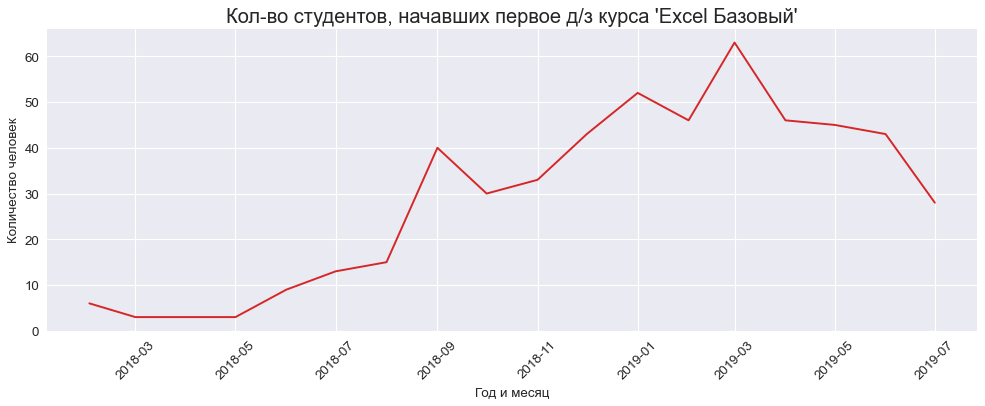

In [39]:
# Import Data
df = hw_per_month.loc[hw_per_month['course_title'] == 'Excel Базовый']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('year_month', 'student_count', data=df, color='tab:red')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Кол-во студентов, начавших первое д/з курса 'Excel Базовый'", fontsize=18)
plt.xlabel('Год и месяц', fontsize=12)
plt.ylabel('Количество человек', fontsize=12)


Text(0, 0.5, 'Количество человек')

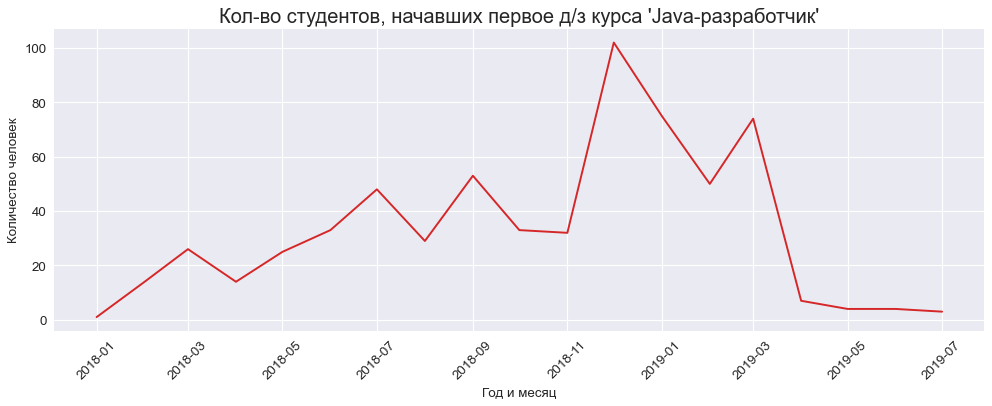

In [40]:
# Import Data
df = hw_per_month.loc[hw_per_month['course_title'] == 'Java-разработчик']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('year_month', 'student_count', data=df, color='tab:red')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Кол-во студентов, начавших первое д/з курса 'Java-разработчик'", fontsize=18)
plt.xlabel('Год и месяц', fontsize=12)
plt.ylabel('Количество человек', fontsize=12)

Text(0, 0.5, 'Количество человек')

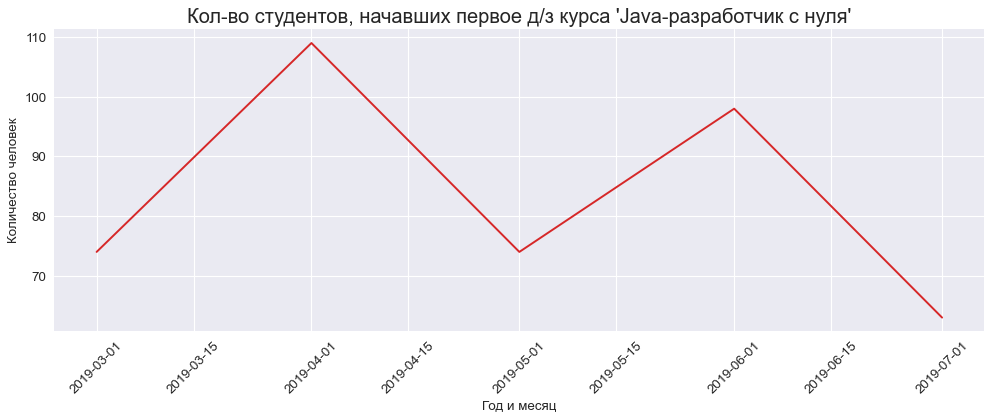

In [41]:
# Import Data
df = hw_per_month.loc[hw_per_month['course_title'] == 'Java-разработчик c нуля']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('year_month', 'student_count', data=df, color='tab:red')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Кол-во студентов, начавших первое д/з курса 'Java-разработчик c нуля'", fontsize=18)
plt.xlabel('Год и месяц', fontsize=12)
plt.ylabel('Количество человек', fontsize=12)

Text(0, 0.5, 'Количество человек')

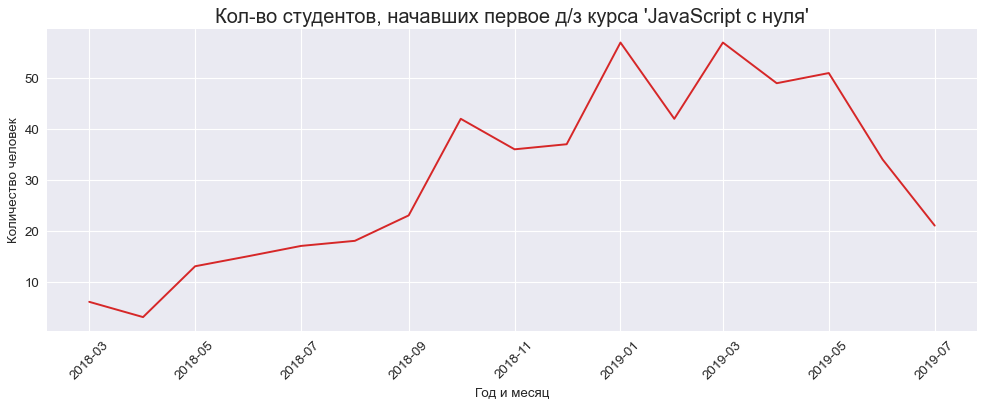

In [42]:
# Import Data
df = hw_per_month.loc[hw_per_month['course_title'] == 'JavaScript с нуля']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('year_month', 'student_count', data=df, color='tab:red')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Кол-во студентов, начавших первое д/з курса 'JavaScript с нуля'", fontsize=18)
plt.xlabel('Год и месяц', fontsize=12)
plt.ylabel('Количество человек', fontsize=12)

Text(0, 0.5, 'Количество человек')

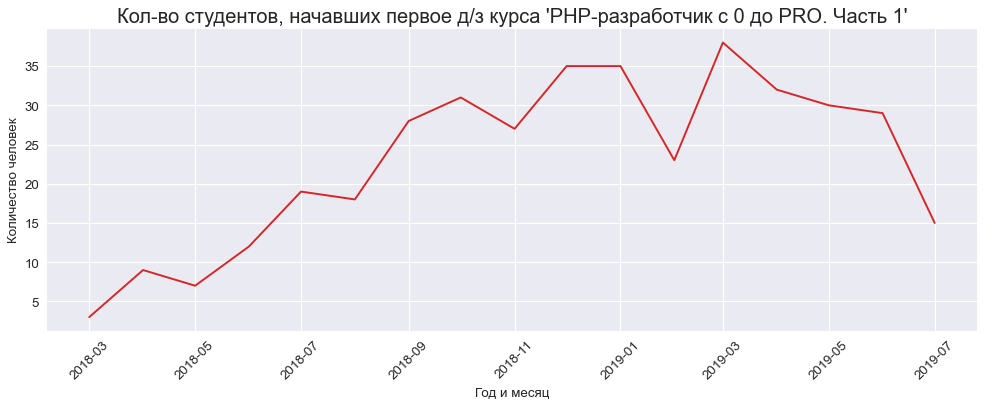

In [43]:
# Import Data
df = hw_per_month.loc[hw_per_month['course_title'] == 'PHP-разработчик с 0 до PRO. Часть 1']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('year_month', 'student_count', data=df, color='tab:red')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Кол-во студентов, начавших первое д/з курса 'PHP-разработчик с 0 до PRO. Часть 1'", fontsize=18)
plt.xlabel('Год и месяц', fontsize=12)
plt.ylabel('Количество человек', fontsize=12)

Text(0, 0.5, 'Количество человек')

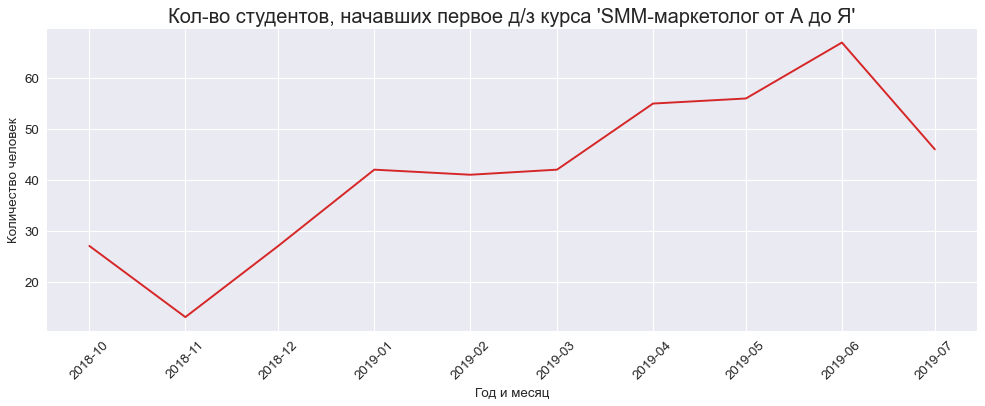

In [44]:
# Import Data
df = hw_per_month.loc[hw_per_month['course_title'] == 'SMM-маркетолог от А до Я']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('year_month', 'student_count', data=df, color='tab:red')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Кол-во студентов, начавших первое д/з курса 'SMM-маркетолог от А до Я'", fontsize=18)
plt.xlabel('Год и месяц', fontsize=12)
plt.ylabel('Количество человек', fontsize=12)

Text(0, 0.5, 'Количество человек')

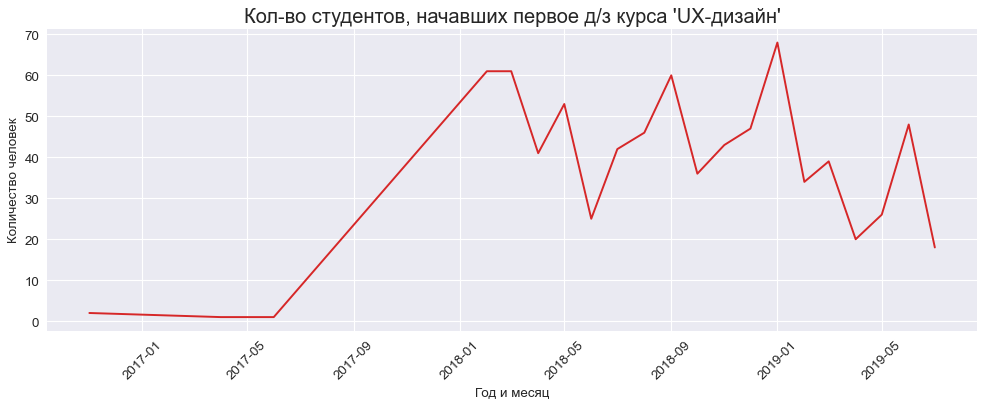

In [45]:
# Import Data
df = hw_per_month.loc[hw_per_month['course_title'] == 'UX-дизайн']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('year_month', 'student_count', data=df, color='tab:red')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Кол-во студентов, начавших первое д/з курса 'UX-дизайн'", fontsize=18)
plt.xlabel('Год и месяц', fontsize=12)
plt.ylabel('Количество человек', fontsize=12)

Text(0, 0.5, 'Количество человек')

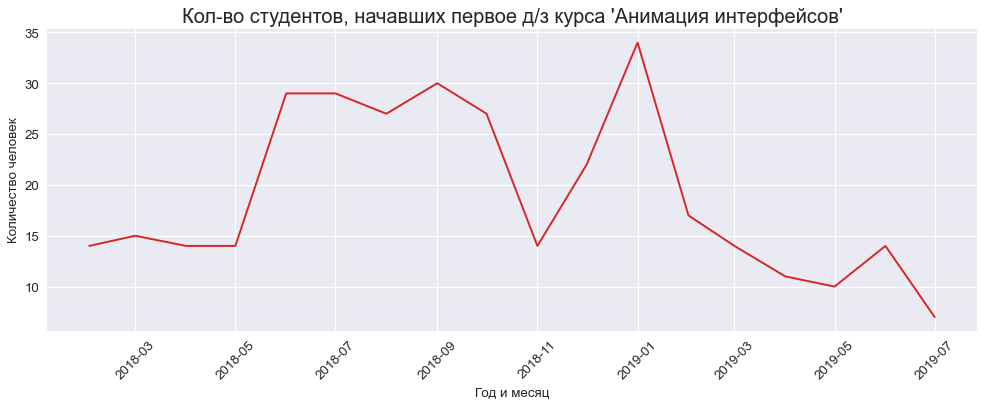

In [46]:
# Import Data
df = hw_per_month.loc[hw_per_month['course_title'] == 'Анимация интерфейсов']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('year_month', 'student_count', data=df, color='tab:red')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Кол-во студентов, начавших первое д/з курса 'Анимация интерфейсов'", fontsize=18)
plt.xlabel('Год и месяц', fontsize=12)
plt.ylabel('Количество человек', fontsize=12)

Text(0, 0.5, 'Количество человек')

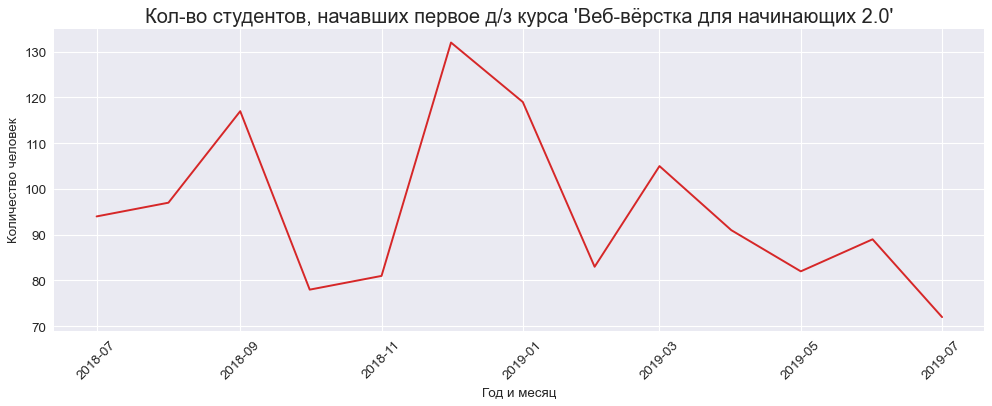

In [47]:
# Import Data
df = hw_per_month.loc[hw_per_month['course_title'] == 'Веб-вёрстка для начинающих 2.0']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('year_month', 'student_count', data=df, color='tab:red')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Кол-во студентов, начавших первое д/з курса 'Веб-вёрстка для начинающих 2.0'", fontsize=18)
plt.xlabel('Год и месяц', fontsize=12)
plt.ylabel('Количество человек', fontsize=12)

Text(0, 0.5, 'Количество человек')

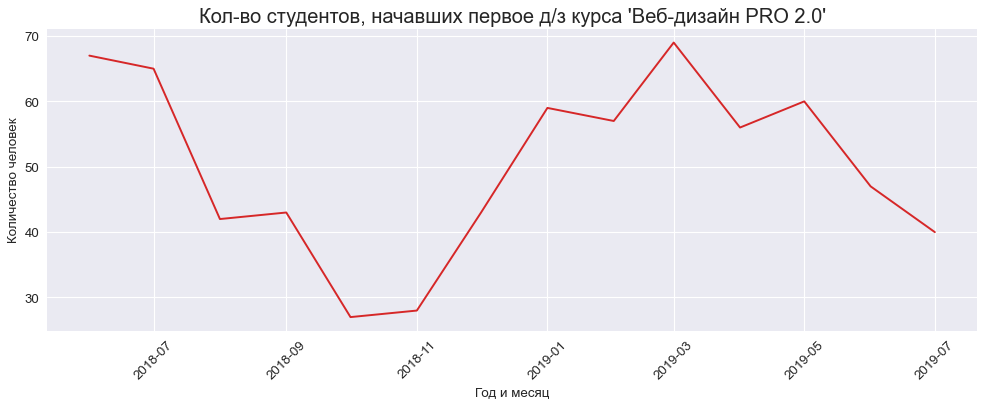

In [48]:
# Import Data
df = hw_per_month.loc[hw_per_month['course_title'] == 'Веб-дизайн PRO 2.0']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('year_month', 'student_count', data=df, color='tab:red')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Кол-во студентов, начавших первое д/з курса 'Веб-дизайн PRO 2.0'", fontsize=18)
plt.xlabel('Год и месяц', fontsize=12)
plt.ylabel('Количество человек', fontsize=12)

Text(0, 0.5, 'Количество человек')

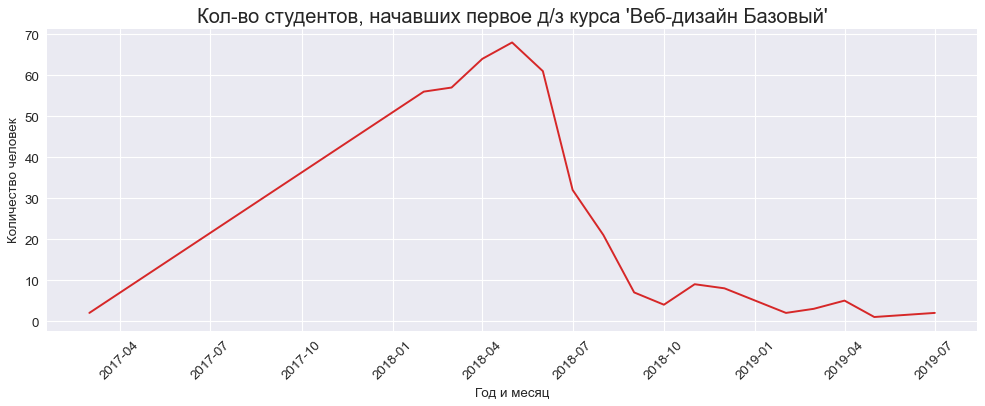

In [49]:
# Import Data
df = hw_per_month.loc[hw_per_month['course_title'] == 'Веб-дизайн Базовый']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('year_month', 'student_count', data=df, color='tab:red')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Кол-во студентов, начавших первое д/з курса 'Веб-дизайн Базовый'", fontsize=18)
plt.xlabel('Год и месяц', fontsize=12)
plt.ylabel('Количество человек', fontsize=12)

Text(0, 0.5, 'Количество человек')

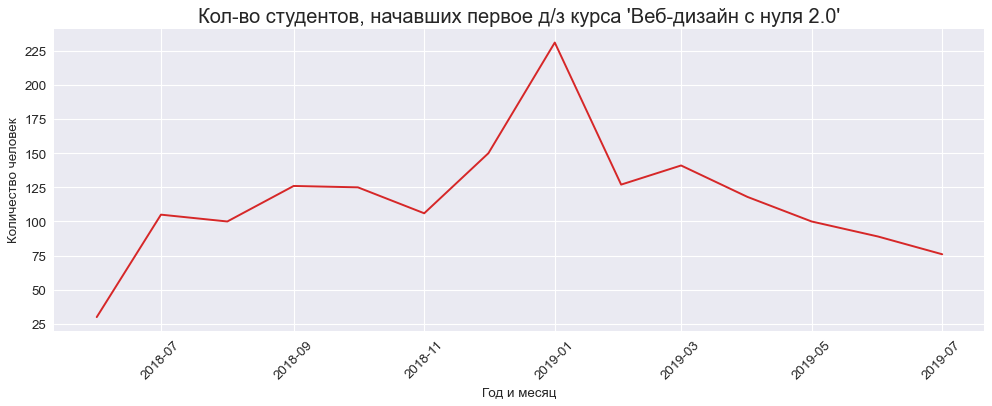

In [50]:
# Import Data
df = hw_per_month.loc[hw_per_month['course_title'] == 'Веб-дизайн с нуля 2.0']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('year_month', 'student_count', data=df, color='tab:red')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Кол-во студентов, начавших первое д/з курса 'Веб-дизайн с нуля 2.0'", fontsize=18)
plt.xlabel('Год и месяц', fontsize=12)
plt.ylabel('Количество человек', fontsize=12)

Text(0, 0.5, 'Количество человек')

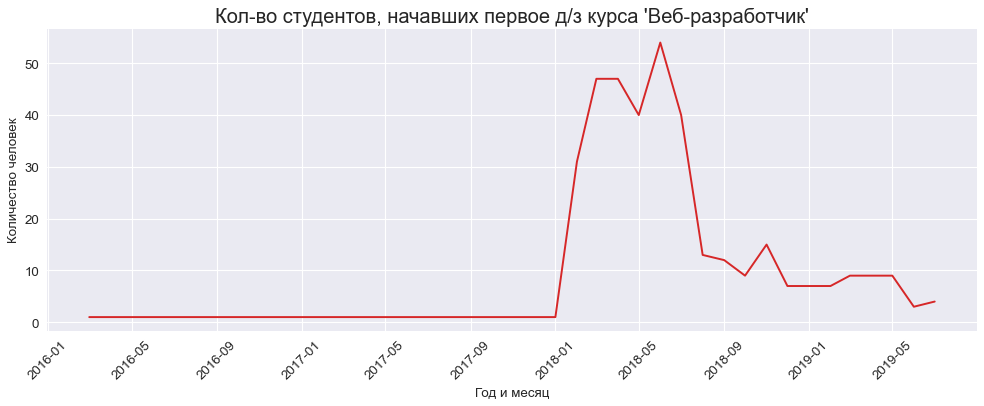

In [51]:
# Import Data
df = hw_per_month.loc[hw_per_month['course_title'] == 'Веб-разработчик']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('year_month', 'student_count', data=df, color='tab:red')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Кол-во студентов, начавших первое д/з курса 'Веб-разработчик'", fontsize=18)
plt.xlabel('Год и месяц', fontsize=12)
plt.ylabel('Количество человек', fontsize=12)

Text(0, 0.5, 'Количество человек')

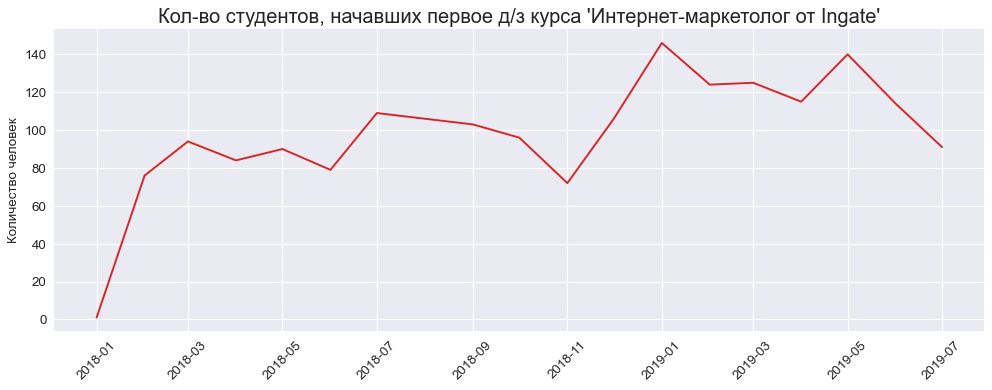

In [52]:
# Import Data
df = hw_per_month.loc[hw_per_month['course_title'] == 'Интернет-маркетолог от Ingate']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('year_month', 'student_count', data=df, color='tab:red')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Кол-во студентов, начавших первое д/з курса 'Интернет-маркетолог от Ingate'", fontsize=18)
plt.ylabel('Количество человек', fontsize=12)

Text(0, 0.5, 'Количество человек')

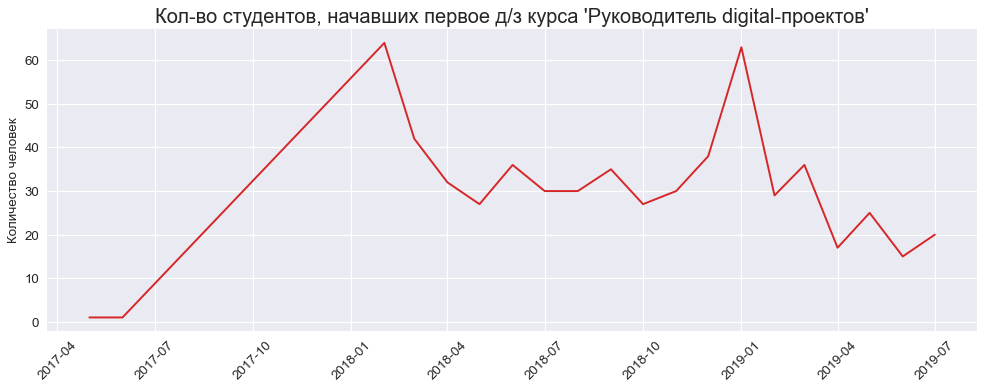

In [53]:
# Import Data
df = hw_per_month.loc[hw_per_month['course_title'] == 'Руководитель digital-проектов']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('year_month', 'student_count', data=df, color='tab:red')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Кол-во студентов, начавших первое д/з курса 'Руководитель digital-проектов'", fontsize=18)
plt.ylabel('Количество человек', fontsize=12)

# Ответ на п. 2.3<br>
На основании первого пункта построим line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса.

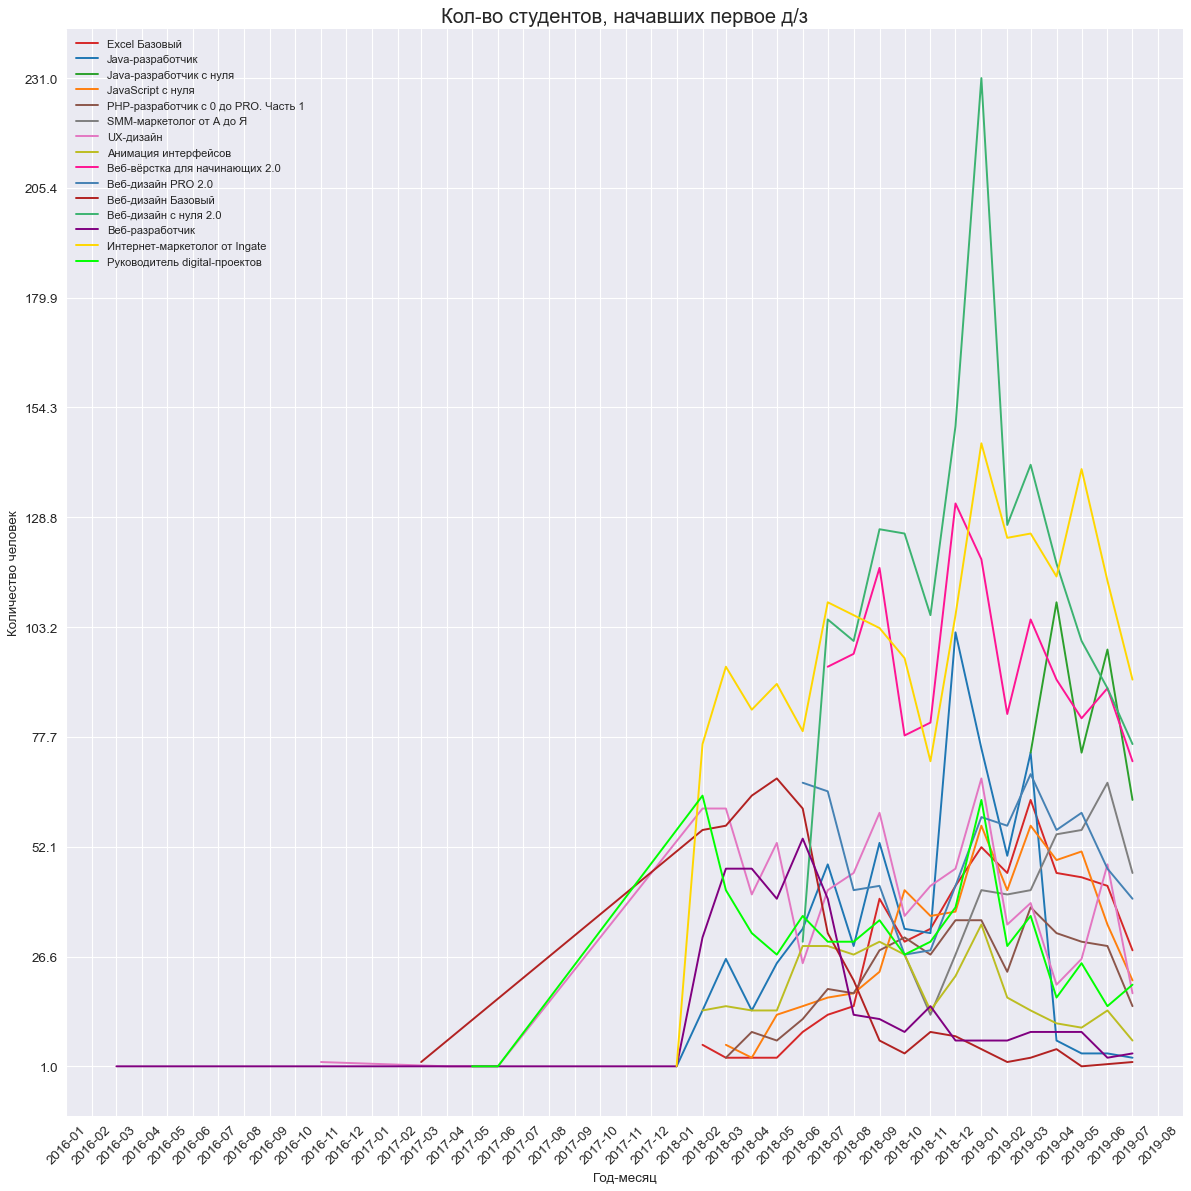

In [54]:
from matplotlib.dates import MonthLocator
import numpy as np

plt.figure(figsize=(15, 15), dpi= 80)

courses = hw_per_month['course_title'].unique()
color_palette = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive', 'deeppink', 'steelblue', 'firebrick', 'mediumseagreen', 'purple', 'gold', 'lime', 'coral'] 

for i, course in enumerate(courses):
    course_data = hw_per_month[hw_per_month["course_title"] == course].sort_values('year_month')
    plt.plot(course_data["year_month"],
             course_data["student_count"],             
             label=course,
             color=color_palette[i])

# Создем MonthLocator чтобы установить тики на начало каждого месяца
month_locator = MonthLocator()

# Устанавливаем locator для x-оси
plt.gca().xaxis.set_major_locator(month_locator)
    
plt.xticks(rotation=45, fontsize=12)

min_count = hw_per_month["student_count"].min()
max_count = hw_per_month["student_count"].max()
num_ticks = 10  # Устанвливаем значение количества тиков (включая min и max)
tick_values = np.linspace(min_count, max_count, num_ticks)  # Создает равномерно распределенные значения

plt.yticks(tick_values, fontsize=12)

plt.title("Кол-во студентов, начавших первое д/з", fontsize=18)
plt.ylabel('Количество человек', fontsize=12)
plt.xlabel('Год-месяц', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Ответ на п. 2.4<br>
Рассчитаем количество прогрессов по выполнению домашних работ в каждом месяце за всю историю

In [55]:
hw_first_base = home_work_first.merge(
    courses_and_progresses, how='left', on=['course_title', 'module_number', 'lesson_number'])

In [56]:
hw_first_base

course_title  module_number  lesson_number  \
0                      Excel Базовый              1             11   
1                      Excel Базовый              1             11   
2                      Excel Базовый              1             11   
3                      Excel Базовый              1             11   
4                      Excel Базовый              1             11   
...                              ...            ...            ...   
10802  Руководитель digital-проектов              1              4   
10803  Руководитель digital-проектов              1              4   
10804  Руководитель digital-проектов              1              4   
10805  Руководитель digital-проектов              1              4   
10806  Руководитель digital-проектов              1              4   

                              course_id                module_title  \
0      ac634845fb0350d0e9d49078aaa4b68f   Основной функционал Excel   
1      ac634845fb0350d0e9d49078aaa4b68f   Основной функционал Excel   
2      ac634845fb0350d0e9d49078aaa4b68f   Основной функционал Excel   
3      ac634845fb0350d0e9d49078aaa4b68f   Основной функционал Excel   
4      ac634845fb0350d0e9d49078aaa4b68f   Основной функционал Excel   
...                                 ...                         ...   
10802  0770b1b039964228294f1f34b29fc2c1  Экологичный путь менеджера   
10803  0770b1b039964228294f1f34b29fc2c1  Экологичный путь менеджера   
10804  0770b1b039964228294f1f34b29fc2c1  Экологичный путь менеджера   
10805  0770b1b039964228294f1f34b29fc2c1  Экологичный путь менеджера   
10806  0770b1b039964228294f1f34b29fc2c1  Экологичный путь менеджера   

          lesson_title                          lesson_token  is_video  \
0      Домашняя работа  3f8ddbc4-7252-4ed8-92eb-337030ea8f45     False   
1      Домашняя работа  3f8ddbc4-7252-4ed8-92eb-337030ea8f45     False   
2      Домашняя работа  3f8ddbc4-7252-4ed8-92eb-337030ea8f45     False   
3      Домашняя работа  3f8ddbc4-7252-4ed8-92eb-337030ea8f45     False   
4      Домашняя работа  3f8ddbc4-7252-4ed8-92eb-337030ea8f45     False   
...                ...                                   ...       ...   
10802  Домашняя работа  8e0b5603-ecc4-46f0-9468-02df445089aa     False   
10803  Домашняя работа  8e0b5603-ecc4-46f0-9468-02df445089aa     False   
10804  Домашняя работа  8e0b5603-ecc4-46f0-9468-02df445089aa     False   
10805  Домашняя работа  8e0b5603-ecc4-46f0-9468-02df445089aa     False   
10806  Домашняя работа  8e0b5603-ecc4-46f0-9468-02df445089aa     False   

       is_homework     field                       progress_id status  \
0             True  Business  254e96b86d572b4685b06afd26941c3f   done   
1             True  Business  f11f4aa8914aec9f51feafa2b7b39a1b   done   
2             True  Business  eb09e4fda04ad88bc2ff8c85a17a323f   done   
3             True  Business  9d3393fe7b21731f9904488a20d0609e   done   
4             True  Business  e9eec59e37bb88e9a3c65510e75d679e   done   
...            ...       ...                               ...    ...   
10802         True  Business  dcd72f12fea3f18492c8dc6755d72a1e   done   
10803         True  Business  385e72033e7ddfdb246f80aeccdf256f   done   
10804         True  Business  d6aecef2950da3d3caab8986a137f425   done   
10805         True  Business  39a5e743f944d87d4e2247709d297d64   done   
10806         True  Business  8c2f35cb1d1d2b4e75f3ac72d1dd7e8a   done   

                          start_date                    finish_date  \
0      2018-12-10 16:15:15.891656+00    2018-12-12 10:17:59.8285+00   
1      2019-05-01 18:59:13.272997+00  2019-05-07 04:13:29.298187+00   
2      2018-11-29 17:32:22.257822+00   2018-12-02 16:34:48.86414+00   
3      2019-04-03 12:05:44.802008+00  2019-04-05 08:31:32.867733+00   
4      2018-08-23 16:41:23.848277+00  2018-09-06 10:38:52.336251+00   
...                              ...                            ...   
10802  2018-04-25 10:04:21.924075+00  2018-04-26 07:37:25.209867+00

In [57]:
hw_first_base['start_date'] = [d.date() for d in pd.to_datetime(hw_first_base['start_date'], format="mixed")]
hw_first_base['start_date'] = pd.to_datetime(hw_first_base['start_date'])
hw_first_base['finish_date'] = [d.date() for d in pd.to_datetime(hw_first_base['finish_date'], format="mixed")]
hw_first_base['finish_date'] = pd.to_datetime(hw_first_base['finish_date'])

In [58]:
# В ячейках, где работа не окончена меняем NaT значения на дату начала выполнения ДЗ, чтобы учесть эту работу как нагрузку только в самом первом месяце
hw_first_base['finish_date'] = hw_first_base['finish_date'].fillna(hw_first_base['start_date'])

In [59]:
# Извлекаем столбцы "Дата начала" и "Дата конца"
start_date_col = hw_first_base['start_date']
end_date_col = hw_first_base['finish_date']
date_ranges = []
for start_date, end_date in zip(start_date_col, end_date_col):
  date_ranges.append(pd.date_range(start_date, end_date))

# Добавляем новый столбец с диапазонами дат
hw_first_base['date_range'] = date_ranges

In [60]:
progress_count = hw_first_base.explode('date_range')

In [61]:
progress_count['date_period'] = progress_count['date_range'].dt.to_period('M')

In [62]:
#progress_count['month_name'] = progress_count['date_range'].dt.strftime('%B')
# способ переименовать дату с типом данных timeperiod в название месяца

In [63]:
# с помощью .size() получим количество саггрегированых строк из колонок 'course_title', 'date_period'
progress_count = progress_count.groupby(['course_title', 'date_period']).size()

# переименуем индекс в колонку "hw_count"
progress_count.name = "hw_count"

# поменяем формат данных в колонке на dataframe
progress_count = progress_count.to_frame().reset_index()

progress_count

course_title date_period  hw_count
0                    Excel Базовый     2018-02        10
1                    Excel Базовый     2018-03         6
2                    Excel Базовый     2018-05         7
3                    Excel Базовый     2018-06        17
4                    Excel Базовый     2018-07        73
..                             ...         ...       ...
245  Руководитель digital-проектов     2019-03       237
246  Руководитель digital-проектов     2019-04        99
247  Руководитель digital-проектов     2019-05       187
248  Руководитель digital-проектов     2019-06       113
249  Руководитель digital-проектов     2019-07        77

[250 rows x 3 columns]

In [64]:
#grouped_df = progress_count.groupby(['course_title', 'date_period']).agg(hw_count=('date_period', 'count'))

# альтернативный способ, чтобы получить аггрегированый датафрейм с созданием новой колонки при помощи .agg()

In [65]:
# меняем тип данных с period на datetime
progress_count['date_period'] = progress_count['date_period'].astype('str')
progress_count['date_period'] = progress_count['date_period'].astype('datetime64[ns]')

# Ответ на п. 2.5<br>
Построимline-graph по четвёртому пункту. 15 графиков.

Text(0, 0.5, 'Количество человек')

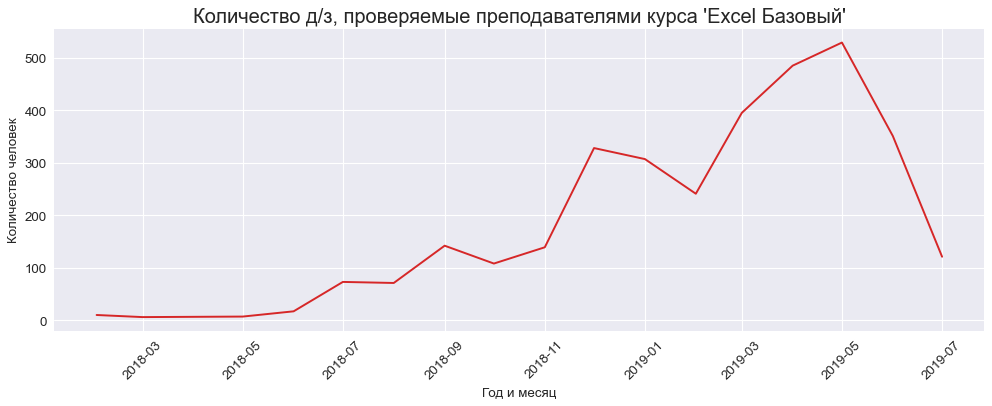

In [66]:
# Import Data
df = progress_count.loc[progress_count['course_title'] == 'Excel Базовый']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('date_period', 'hw_count', data=df, color='tab:red')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Количество д/з, проверяемые преподавателями курса 'Excel Базовый'", fontsize=18)
plt.xlabel('Год и месяц', fontsize=12)
plt.ylabel('Количество человек', fontsize=12)

Text(0, 0.5, 'Количество человек')

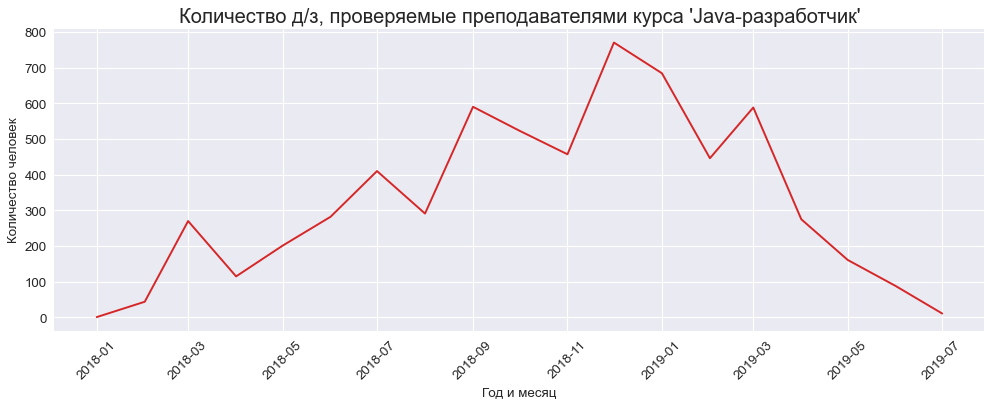

In [67]:
# Import Data
df = progress_count.loc[progress_count['course_title'] == 'Java-разработчик']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('date_period', 'hw_count', data=df, color='tab:red')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Количество д/з, проверяемые преподавателями курса 'Java-разработчик'", fontsize=18)
plt.xlabel('Год и месяц', fontsize=12)
plt.ylabel('Количество человек', fontsize=12)

Text(0, 0.5, 'Количество человек')

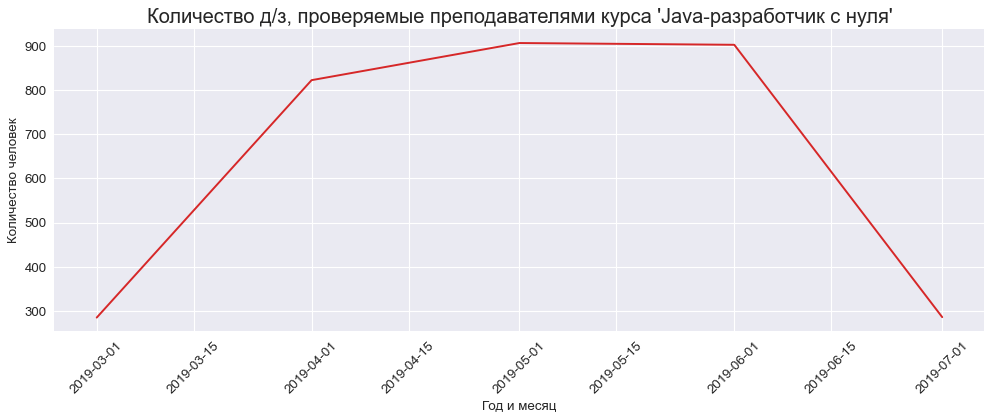

In [68]:
# Import Data
df = progress_count.loc[progress_count['course_title'] == 'Java-разработчик c нуля']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('date_period', 'hw_count', data=df, color='tab:red')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Количество д/з, проверяемые преподавателями курса 'Java-разработчик c нуля'", fontsize=18)
plt.xlabel('Год и месяц', fontsize=12)
plt.ylabel('Количество человек', fontsize=12)

Text(0, 0.5, 'Количество человек')

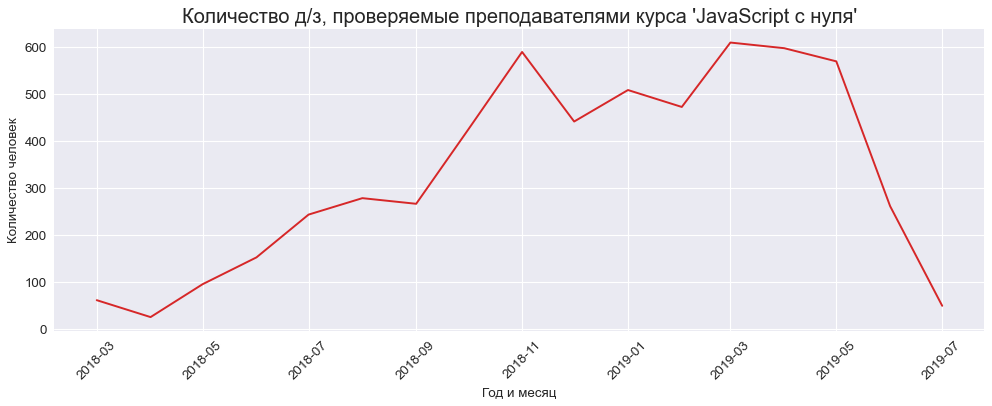

In [69]:
# Import Data
df = progress_count.loc[progress_count['course_title'] == 'JavaScript с нуля']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('date_period', 'hw_count', data=df, color='tab:red')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Количество д/з, проверяемые преподавателями курса 'JavaScript с нуля'", fontsize=18)
plt.xlabel('Год и месяц', fontsize=12)
plt.ylabel('Количество человек', fontsize=12)

Text(0, 0.5, 'Количество человек')

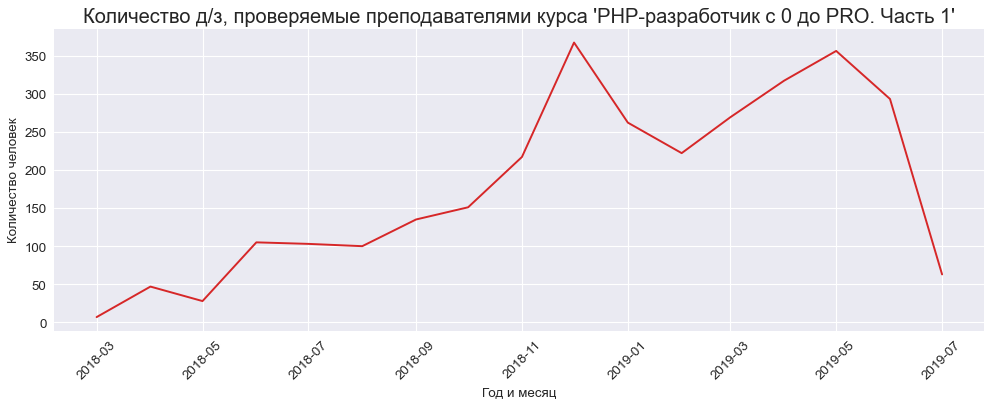

In [70]:
# Import Data
df = progress_count.loc[progress_count['course_title'] == 'PHP-разработчик с 0 до PRO. Часть 1']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('date_period', 'hw_count', data=df, color='tab:red')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Количество д/з, проверяемые преподавателями курса 'PHP-разработчик с 0 до PRO. Часть 1'", fontsize=18)
plt.xlabel('Год и месяц', fontsize=12)
plt.ylabel('Количество человек', fontsize=12)

Text(0, 0.5, 'Количество человек')

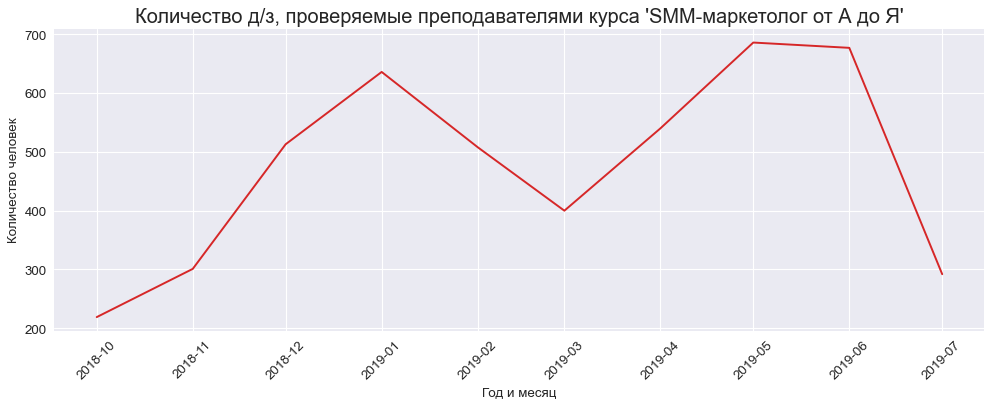

In [71]:
# Import Data
df = progress_count.loc[progress_count['course_title'] == 'SMM-маркетолог от А до Я']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('date_period', 'hw_count', data=df, color='tab:red')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Количество д/з, проверяемые преподавателями курса 'SMM-маркетолог от А до Я'", fontsize=18)
plt.xlabel('Год и месяц', fontsize=12)
plt.ylabel('Количество человек', fontsize=12)

Text(0, 0.5, 'Количество человек')

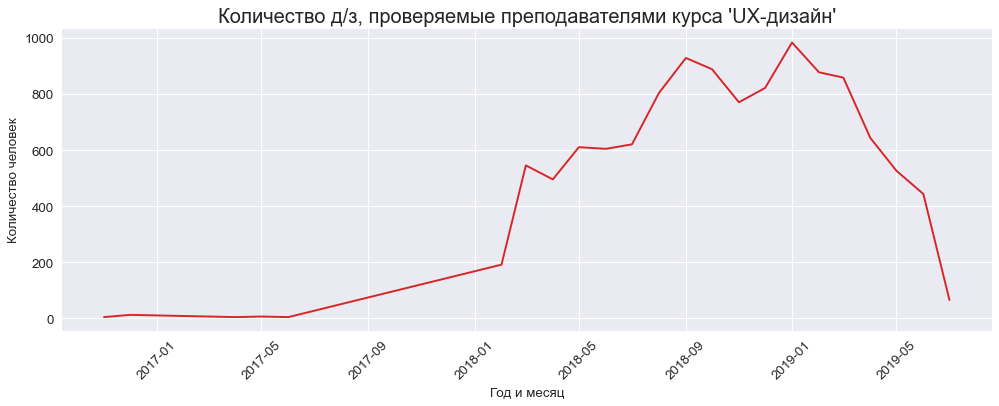

In [72]:
# Import Data
df = progress_count.loc[progress_count['course_title'] == 'UX-дизайн']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('date_period', 'hw_count', data=df, color='tab:red')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Количество д/з, проверяемые преподавателями курса 'UX-дизайн'", fontsize=18)
plt.xlabel('Год и месяц', fontsize=12)
plt.ylabel('Количество человек', fontsize=12)

Text(0, 0.5, 'Количество человек')

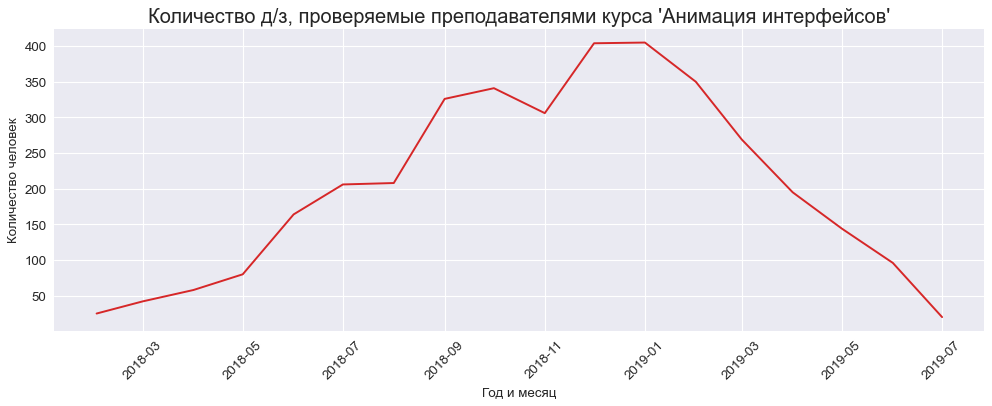

In [73]:
# Import Data
df = progress_count.loc[progress_count['course_title'] == 'Анимация интерфейсов']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('date_period', 'hw_count', data=df, color='tab:red')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Количество д/з, проверяемые преподавателями курса 'Анимация интерфейсов'", fontsize=18)
plt.xlabel('Год и месяц', fontsize=12)
plt.ylabel('Количество человек', fontsize=12)

Text(0, 0.5, 'Количество человек')

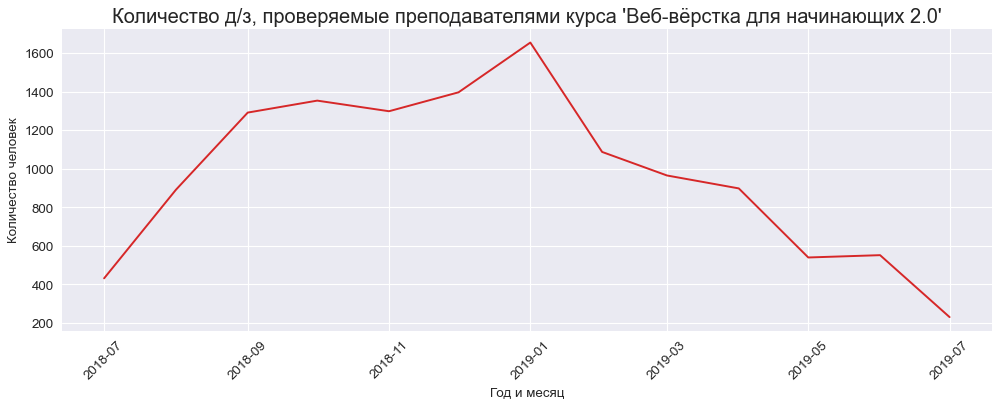

In [74]:
# Import Data
df = progress_count.loc[progress_count['course_title'] == 'Веб-вёрстка для начинающих 2.0']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('date_period', 'hw_count', data=df, color='tab:red')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Количество д/з, проверяемые преподавателями курса 'Веб-вёрстка для начинающих 2.0'", fontsize=18)
plt.xlabel('Год и месяц', fontsize=12)
plt.ylabel('Количество человек', fontsize=12)

Text(0, 0.5, 'Количество человек')

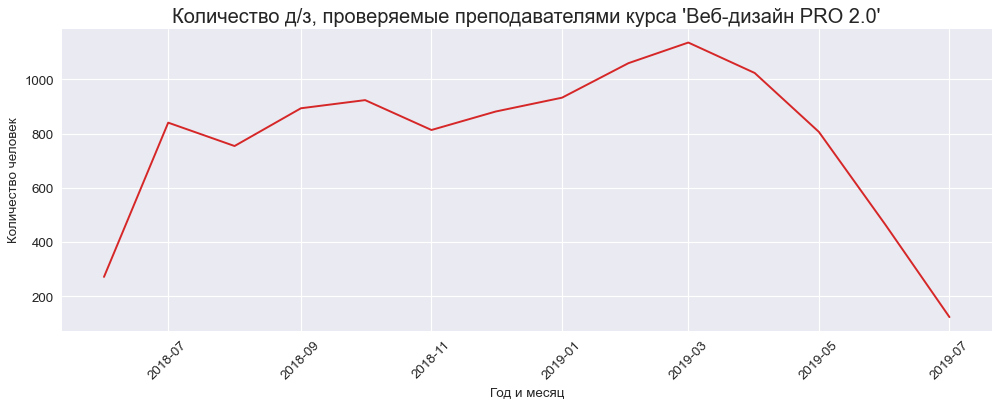

In [75]:
# Import Data
df = progress_count.loc[progress_count['course_title'] == 'Веб-дизайн PRO 2.0']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('date_period', 'hw_count', data=df, color='tab:red')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Количество д/з, проверяемые преподавателями курса 'Веб-дизайн PRO 2.0'", fontsize=18)
plt.xlabel('Год и месяц', fontsize=12)
plt.ylabel('Количество человек', fontsize=12)

Text(0, 0.5, 'Количество человек')

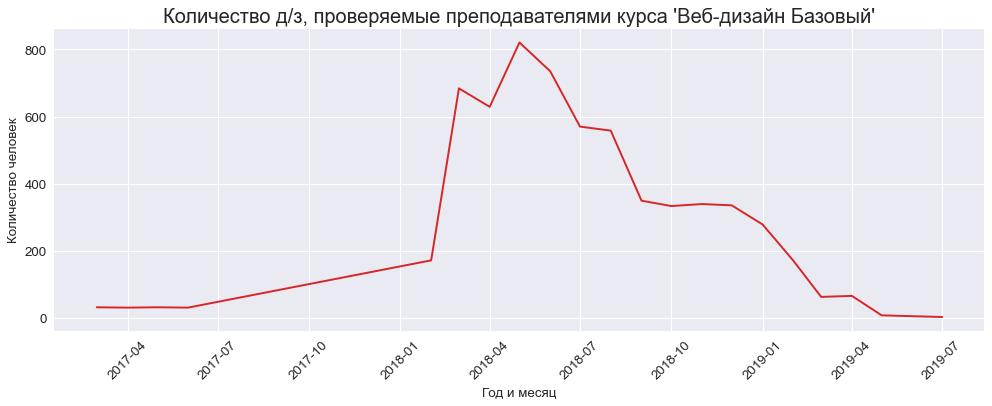

In [76]:
# Import Data
df = progress_count.loc[progress_count['course_title'] == 'Веб-дизайн Базовый']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('date_period', 'hw_count', data=df, color='tab:red')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Количество д/з, проверяемые преподавателями курса 'Веб-дизайн Базовый'", fontsize=18)
plt.xlabel('Год и месяц', fontsize=12)
plt.ylabel('Количество человек', fontsize=12)

Text(0, 0.5, 'Количество человек')

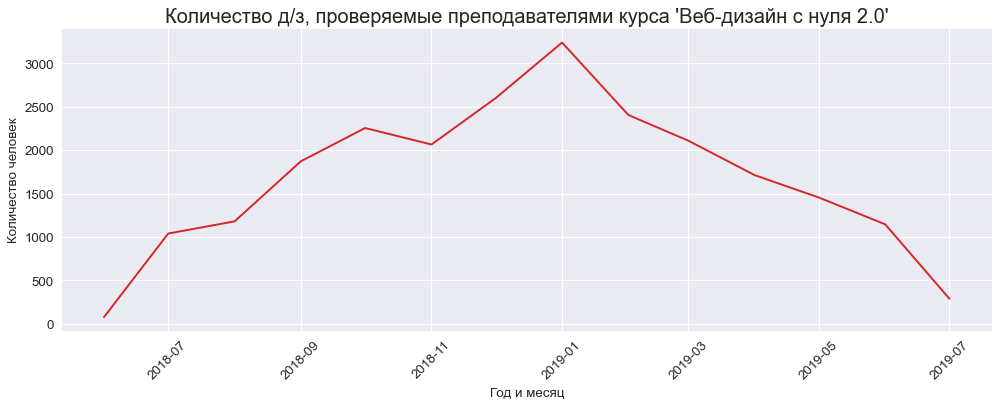

In [77]:
# Import Data
df = progress_count.loc[progress_count['course_title'] == 'Веб-дизайн с нуля 2.0']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('date_period', 'hw_count', data=df, color='tab:red')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Количество д/з, проверяемые преподавателями курса 'Веб-дизайн с нуля 2.0'", fontsize=18)
plt.xlabel('Год и месяц', fontsize=12)
plt.ylabel('Количество человек', fontsize=12)

Text(0, 0.5, 'Количество человек')

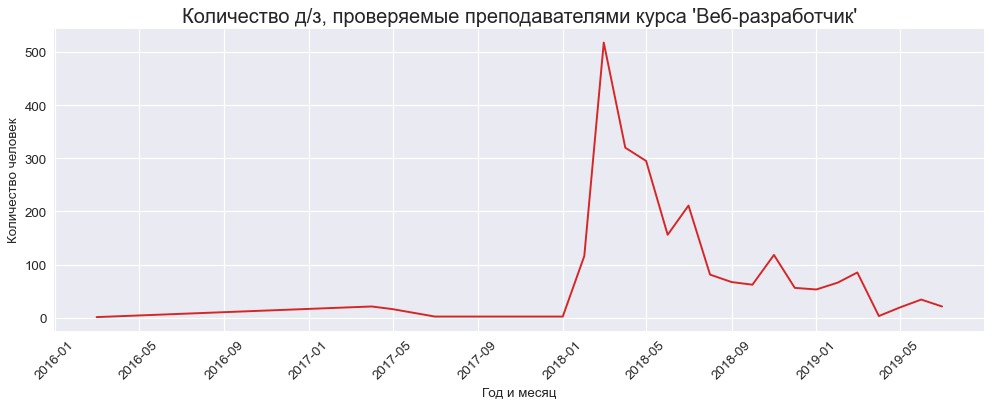

In [78]:
# Import Data
df = progress_count.loc[progress_count['course_title'] == 'Веб-разработчик']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('date_period', 'hw_count', data=df, color='tab:red')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Количество д/з, проверяемые преподавателями курса 'Веб-разработчик'", fontsize=18)
plt.xlabel('Год и месяц', fontsize=12)
plt.ylabel('Количество человек', fontsize=12)

Text(0, 0.5, 'Количество человек')

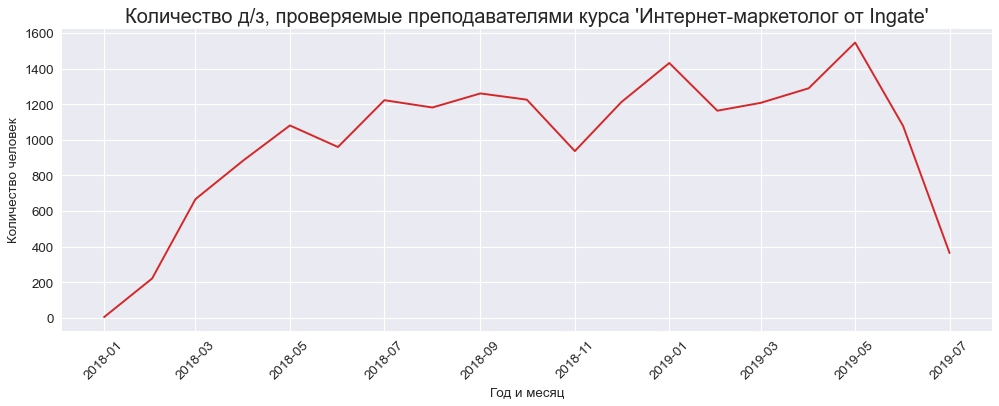

In [79]:
# Import Data
df = progress_count.loc[progress_count['course_title'] == 'Интернет-маркетолог от Ingate']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('date_period', 'hw_count', data=df, color='tab:red')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Количество д/з, проверяемые преподавателями курса 'Интернет-маркетолог от Ingate'", fontsize=18)
plt.xlabel('Год и месяц', fontsize=12)
plt.ylabel('Количество человек', fontsize=12)

Text(0, 0.5, 'Количество человек')

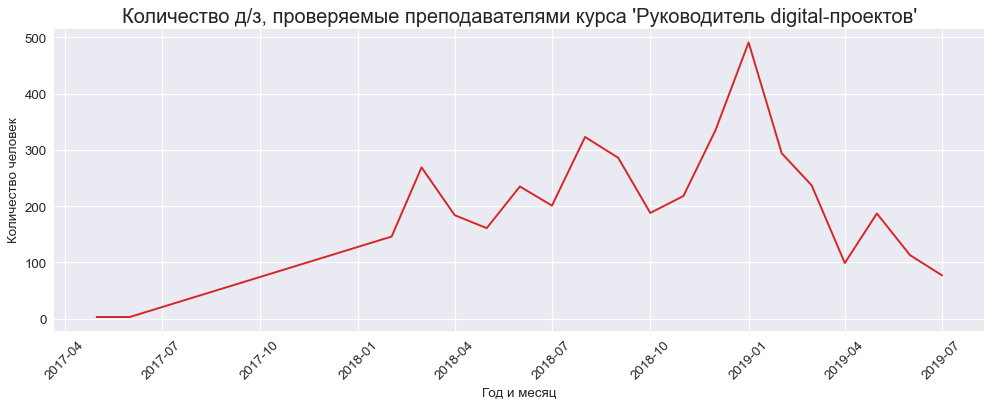

In [80]:
# Import Data
df = progress_count.loc[progress_count['course_title'] == 'Руководитель digital-проектов']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('date_period', 'hw_count', data=df, color='tab:red')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Количество д/з, проверяемые преподавателями курса 'Руководитель digital-проектов'", fontsize=18)
plt.xlabel('Год и месяц', fontsize=12)
plt.ylabel('Количество человек', fontsize=12)

# Ответ на п. 2.6<br>
Построим один line-graph для всех курсов по четвёртому пункту. 15 линий на графике

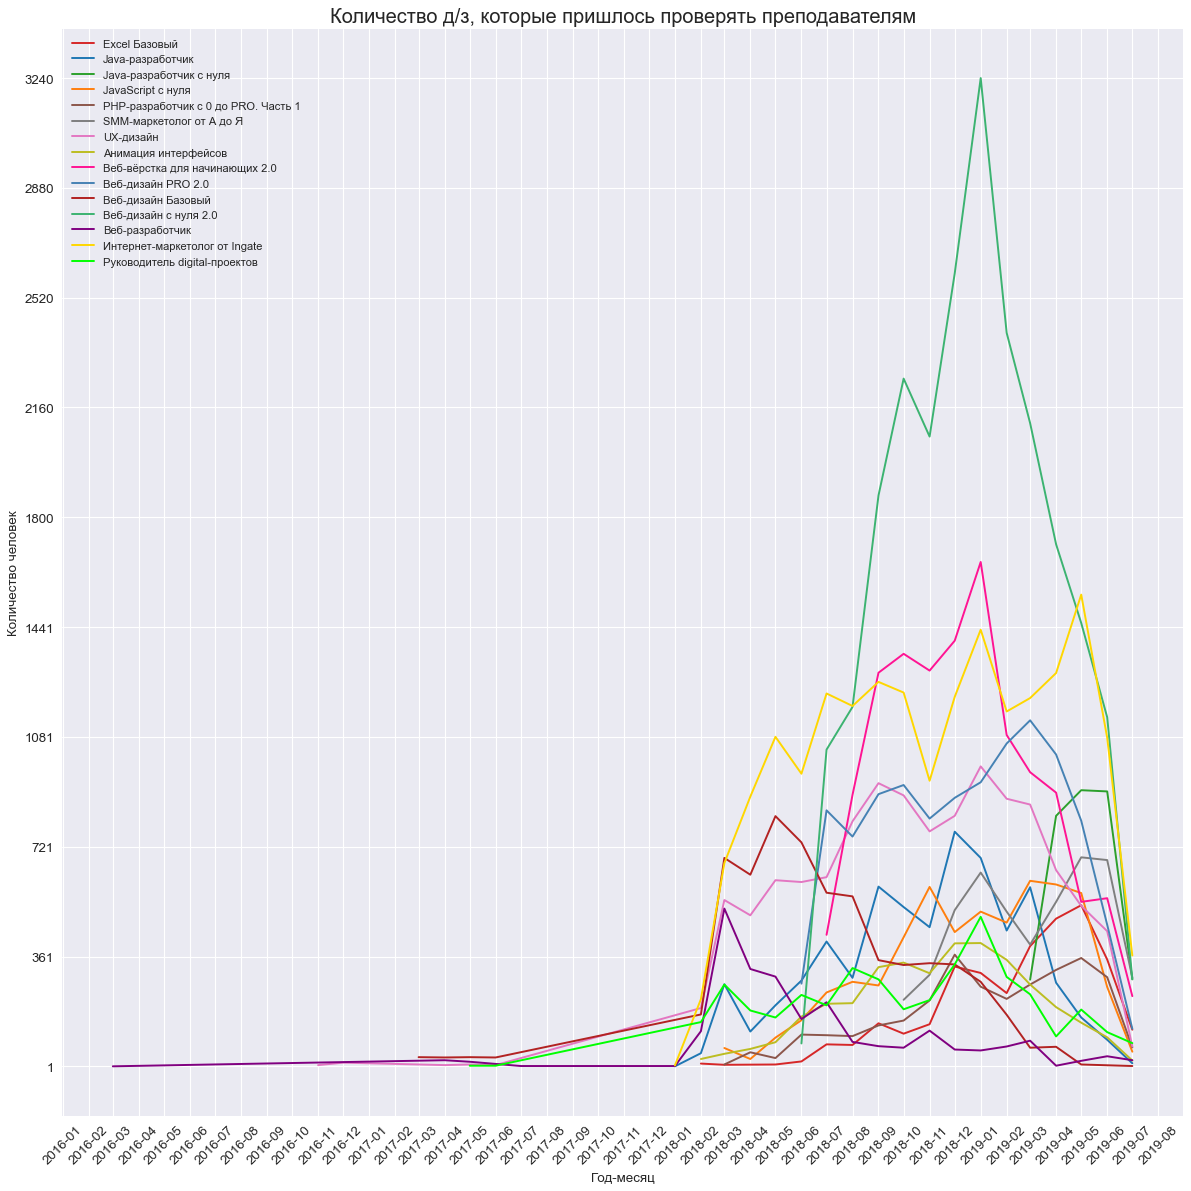

In [81]:
plt.figure(figsize=(15, 15), dpi= 80)

courses = progress_count['course_title'].unique()
color_palette = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive', 'deeppink', 'steelblue', 'firebrick', 'mediumseagreen', 'purple', 'gold', 'lime', 'coral'] 

for i, course in enumerate(courses):
    course_data = progress_count[progress_count["course_title"] == course].sort_values('date_period')
    plt.plot(course_data["date_period"],
             course_data["hw_count"],             
             label=course,
             color=color_palette[i])

# Создем MonthLocator чтобы установить тики на начало каждого месяца
month_locator = MonthLocator()

# Устанавливаем locator для x-оси
plt.gca().xaxis.set_major_locator(month_locator)
    
plt.xticks(rotation=45, fontsize=12)

min_count = progress_count["hw_count"].min()
max_count = progress_count["hw_count"].max()
num_ticks = 10  # Устанвливаем значение количества тиков (включая min и max)
tick_values = np.linspace(min_count, max_count, num_ticks)  # Создает равномерно распределенные значения

plt.yticks(tick_values, fontsize=12)
    
plt.title("Количество д/з, которые пришлось проверять преподавателям", fontsize=18)
plt.ylabel('Количество человек', fontsize=12)
plt.xlabel('Год-месяц', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

Первый значительный скачок начала студентами первого ДЗ происходил в августе-сентябре 2018 далее количество растет и достигает пика активности в декабре 2018-январе 2019 и падает к июлю 2019
Нагрузка на преподавателей имеет точно такую же динамику

## 3. Выявление проблемных модулей

1. Рассчитаем минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса
2. На основании первого пункта построим line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков.
3. Чтобы выявить сезонность, посчитаем медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса. То есть посчитать для каждого месяца, медианное время выполнения работ, которые были начаты в этом месяце.
4. На основании третьего пункта построим line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам. 15 линий на графике.
5. На основании рассчитанных значений сделаем аналитический вывод

# Ответ на п. 3.1<br>
Рассчитаем минимальное, максимальное, среднее, медианное время прохождения каждого модуля для каждого курса.

In [82]:
h_w_done = home_work.dropna(subset=['finish_date'])

h_w_done = h_w_done.copy()
#h_w_done['start_date'] = [d.date() for d in pd.to_datetime(h_w_done['start_date'])]
h_w_done['start_date'] = pd.to_datetime(h_w_done['start_date'], format="mixed")
#h_w_done['finish_date'] = [d.date() for d in pd.to_datetime(h_w_done['finish_date'])]
h_w_done['finish_date'] = pd.to_datetime(h_w_done['finish_date'], format="mixed")

In [83]:
h_w_done['duration'] = h_w_done['finish_date'] - h_w_done['start_date']

In [84]:
h_w_done

course_id  module_number  \
980     04ba6d0b40670c43a209141fa01fa784              1   
981     04ba6d0b40670c43a209141fa01fa784              1   
982     04ba6d0b40670c43a209141fa01fa784              1   
983     04ba6d0b40670c43a209141fa01fa784              1   
984     04ba6d0b40670c43a209141fa01fa784              1   
...                                  ...            ...   
350669  e9bb9205eeed307ee7cbaa08bfd166c3             18   
350670  e9bb9205eeed307ee7cbaa08bfd166c3             18   
350672  e9bb9205eeed307ee7cbaa08bfd166c3             18   
350673  e9bb9205eeed307ee7cbaa08bfd166c3             18   
350676  e9bb9205eeed307ee7cbaa08bfd166c3             18   

                                             module_title  lesson_number  \
980     Введение в Motion Design. Тренды, разновидност...              3   
981     Введение в Motion Design. Тренды, разновидност...              3   
982     Введение в Motion Design. Тренды, разновидност...              3   
983     Введение в Motion Design. Тренды, разновидност...              3   
984     Введение в Motion Design. Тренды, разновидност...              3   
...                                                   ...            ...   
350669                            Экзаменационное задание              1   
350670                            Экзаменационное задание              1   
350672                            Экзаменационное задание              1   
350673                            Экзаменационное задание              1   
350676                            Экзаменационное задание              1   

                  lesson_title                          lesson_token  \
980            Домашняя работа  c4377574-d117-45c7-8da5-dd7d1923517d   
981            Домашняя работа  c4377574-d117-45c7-8da5-dd7d1923517d   
982            Домашняя работа  c4377574-d117-45c7-8da5-dd7d1923517d   
983            Домашняя работа  c4377574-d117-45c7-8da5-dd7d1923517d   
984            Домашняя работа  c4377574-d117-45c7-8da5-dd7d1923517d   
...                        ...                                   ...   
350669  Экзаменационная работа  c2393457-b95e-46ac-b2c7-cd9b7d5f8ba4   
350670  Экзаменационная работа  c2393457-b95e-46ac-b2c7-cd9b7d5f8ba4   
350672  Экзаменационная работа  c2393457-b95e-46ac-b2c7-cd9b7d5f8ba4   
350673  Экзаменационная работа  c2393457-b95e-46ac-b2c7-cd9b7d5f8ba4   
350676  Экзаменационная работа  c2393457-b95e-46ac-b2c7-cd9b7d5f8ba4   

        is_video  is_homework          course_title        field  \
980        False         True  Анимация интерфейсов       Design   
981        False         True  Анимация интерфейсов       Design   
982        False         True  Анимация интерфейсов       Design   
983        False         True  Анимация интерфейсов       Design   
984        False         True  Анимация интерфейсов       Design   
...          ...          ...                   ...          ...   
350669     False         True     JavaScript с нуля  Development   
350670     False         True     JavaScript с нуля  Development   
350672     False         True     JavaScript с нуля  Development   
350673     False         True     JavaScript с нуля  Development   
350676     False         True     JavaScript с нуля  Development   

                             progress_id status  \
980     c29cf5d7f832d3e82f99a118223eb729   done   
981     b431e4ed2a994d9a8435553c52967ffe   done   
982     611adeffa3b1c685f061d84bb34a4c16   done   
983     0029682bdb5be81e3bc3966ab728cf0c   done   
984     1a2ebe5028779875d5184be082048ee3   done   
...                                  ...    ...   
350669  f80caff0f62a5e28e2f8942757f5b004   done   
350670  f7b7722e357c85d5ceeb0c1dcac59d72   done   
350672  5c002cb09fed4ee2c24f36ebee4992d9   done   
350673  065262d4558c46a866de90a5533e710f   done   
350676  193b32f077b9f1c8fbec593e8065afcf   done   

                             start_date                      finish_date  \
980    2018-09-01 11:41:39.358335+00:0

In [85]:
h_w_done.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44925 entries, 980 to 350676
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   course_id      44925 non-null  object             
 1   module_number  44925 non-null  int64              
 2   module_title   44925 non-null  object             
 3   lesson_number  44925 non-null  int64              
 4   lesson_title   44925 non-null  object             
 5   lesson_token   44925 non-null  object             
 6   is_video       44925 non-null  bool               
 7   is_homework    44925 non-null  bool               
 8   course_title   44925 non-null  object             
 9   field          44925 non-null  object             
 10  progress_id    44925 non-null  object             
 11  status         44925 non-null  object             
 12  start_date     44925 non-null  datetime64[ns, UTC]
 13  finish_date    44925 non-null  datetime64[ns, UT

In [86]:
hw_duration_min = h_w_done.groupby(
    ['course_title', 'module_title'])[
    'duration'].min().reset_index().sort_values('duration')

In [87]:
hw_duration_min

course_title  \
22                      Java-разработчик   
164        Интернет-маркетолог от Ingate   
163        Интернет-маркетолог от Ingate   
153                      Веб-разработчик   
121                   Веб-дизайн Базовый   
..                                   ...   
52   PHP-разработчик с 0 до PRO. Часть 1   
87                  Анимация интерфейсов   
114                   Веб-дизайн Базовый   
50                     JavaScript с нуля   
54   PHP-разработчик с 0 до PRO. Часть 1   

                                          module_title  \
22                                     Синтаксис языка   
164                                       Маркетплейсы   
163  Контент-маркетинг: стратегия коммуникации, кан...   
153                                        О программе   
121                 Формы и кнопки. Практика Photoshop   
..                                                 ...   
52                                   База данных MySQL   
87                                    Дипломная работа   
114                                   Дипломная работа   
50                             Экзаменационное задание   
54                                     Курсовая работа   

                    duration  
22  -1 days +23:59:59.997688  
164 -1 days +23:59:59.999380  
163 -1 days +23:59:59.999427  
153 -1 days +23:59:59.999438  
121 -1 days +23:59:59.999456  
..                       ...  
52    4 days 17:16:38.195570  
87    6 days 23:24:25.208372  
114   9 days 20:08:00.313073  
50   10 days 12:42:49.501934  
54   25 days 06:39:06.168079  

[190 rows x 3 columns]

In [88]:
hw_duration_max = h_w_done.groupby(
    ['course_title', 'module_title'])[
    'duration'].max().reset_index().sort_values('duration')
hw_duration_max

course_title  \
31         Java-разработчик c нуля   
171  Интернет-маркетолог от Ingate   
60        SMM-маркетолог от А до Я   
107             Веб-дизайн PRO 2.0   
30         Java-разработчик c нуля   
..                             ...   
159  Интернет-маркетолог от Ingate   
182  Руководитель digital-проектов   
161  Интернет-маркетолог от Ingate   
16                Java-разработчик   
24                Java-разработчик   

                                          module_title  \
31                            Работа с файлами и сетью   
171                             Финальное тестирование   
60                           Как писать хорошие тексты   
107                  План развития дизайнера на 3 года   
30                              Особенности ООП в Java   
..                                                 ...   
159  Введение в интернет-маркетинг: цели, инструмен...   
182  Переговорные навыки. Провокации. Работа с возр...   
161  Исследование целевой аудитории: портретировани...   
16                                    Объекты и классы   
24                                Числа, строки и даты   

                    duration  
31   13 days 16:27:35.418459  
171  17 days 00:12:04.636730  
60   20 days 13:32:33.135132  
107  22 days 16:26:03.240705  
30   28 days 21:11:44.432084  
..                       ...  
159 444 days 22:39:48.887420  
182 457 days 18:48:05.903324  
161 464 days 07:23:54.734847  
16  475 days 13:37:01.242913  
24  484 days 10:50:05.550958  

[190 rows x 3 columns]

In [89]:
# Преобразовать значения timedelta в секунды
h_w_done['duration_seconds'] = h_w_done['duration'].dt.total_seconds()

# Перевести значения из секунд в дни
h_w_done['duration_days'] = h_w_done['duration_seconds'] / 86400

In [90]:
# Вычислить среднее значение и отсортировать
hw_duration_mean = h_w_done.groupby(
    ['course_title', 'module_title'])[
    'duration_days'].mean().reset_index().sort_values('duration_days')

# Перевести значения из секунд в timedelta
#hw_duration_mean['duration_timedelta'] = hw_duration_mean[
    #'duration_seconds'].apply(lambda x: pd.Timedelta(seconds=x))

# Преобразовываем значения в целые числа
hw_duration_mean['duration_days'] = hw_duration_mean['duration_days'].astype(int)

hw_duration_mean

course_title  \
31               Java-разработчик c нуля   
5                          Excel Базовый   
33               Java-разработчик c нуля   
2                          Excel Базовый   
30               Java-разработчик c нуля   
..                                   ...   
71                             UX-дизайн   
155                      Веб-разработчик   
75                             UX-дизайн   
114                   Веб-дизайн Базовый   
54   PHP-разработчик с 0 до PRO. Часть 1   

                                module_title  duration_days  
31                  Работа с файлами и сетью              3  
5          Формулы и функции Excel. Введение              3  
33                      Числа, строки и даты              3  
2    Основной функционал Excel (продолжение)              4  
30                    Особенности ООП в Java              4  
..                                       ...            ...  
71           Visual design теория и практика             64  
155                  Экзаменационная работа              67  
75              Техника успешной презентации             69  
114                         Дипломная работа             85  
54                           Курсовая работа             98  

[190 rows x 3 columns]

In [91]:
hw_duration_median = h_w_done.groupby(
    ['course_title', 'module_title'])[
    'duration_days'].median().reset_index().sort_values('duration_days')


#hw_duration_median['duration_timedelta'] = hw_duration_median[
    #duration_seconds'].apply(lambda x: pd.Timedelta(seconds=x))

# Преобразовываем значения в целые числа
hw_duration_median['duration_days'] = hw_duration_median['duration_days'].astype(int)

hw_duration_median

course_title                       module_title  \
173        Интернет-маркетолог от Ingate        Юридическая сторона рекламы   
153                      Веб-разработчик                        О программе   
33               Java-разработчик c нуля               Числа, строки и даты   
5                          Excel Базовый  Формулы и функции Excel. Введение   
53   PHP-разработчик с 0 до PRO. Часть 1        Введение в программирование   
..                                   ...                                ...   
50                     JavaScript с нуля            Экзаменационное задание   
75                             UX-дизайн       Техника успешной презентации   
71                             UX-дизайн    Visual design теория и практика   
114                   Веб-дизайн Базовый                   Дипломная работа   
54   PHP-разработчик с 0 до PRO. Часть 1                    Курсовая работа   

     duration_days  
173              1  
153              1  
33               1  
5                1  
53               1  
..             ...  
50              41  
75              44  
71              55  
114             62  
54              89  

[190 rows x 3 columns]

# Ответ на п. 3.2<br>
На основании первого пункта построим line-graph с медианным временем прохождения каждого модуля для каждого курса.

Text(0, 0.5, 'Затраченное время, дни')

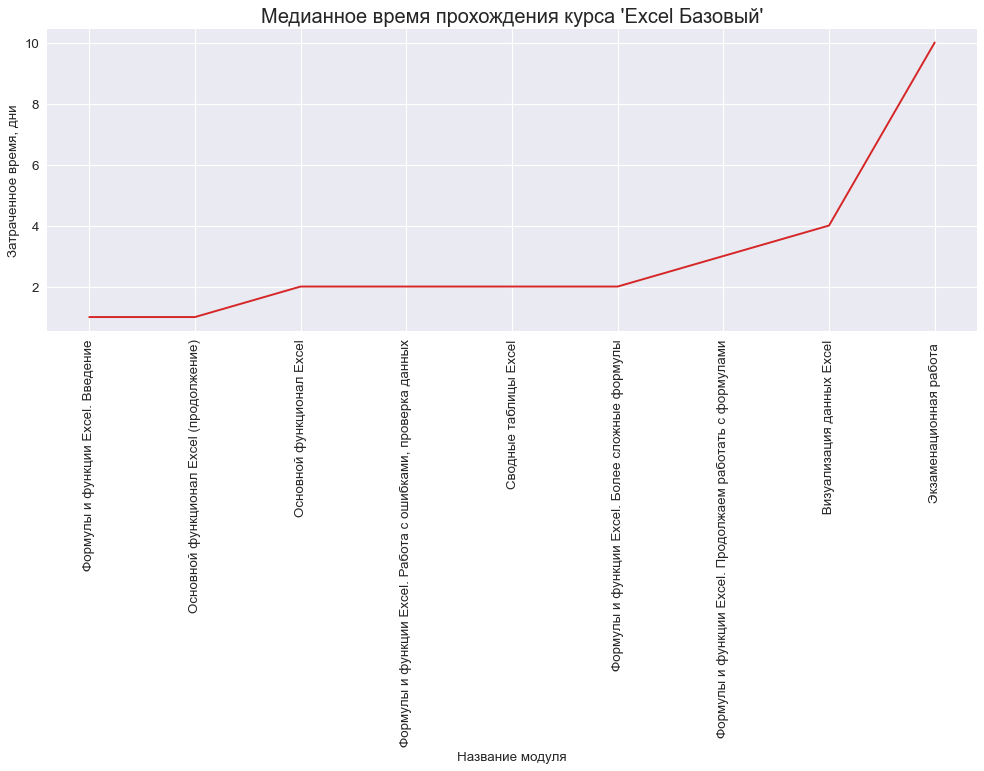

In [92]:
# Import Data
df = hw_duration_median.loc[hw_duration_median['course_title'] == 'Excel Базовый']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('module_title', 'duration_days', data=df, color='tab:red')

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Медианное время прохождения курса 'Excel Базовый'", fontsize=18)
plt.xlabel('Название модуля', fontsize=12)
plt.ylabel('Затраченное время, дни', fontsize=12)

Text(0, 0.5, 'Затраченное время, дни')

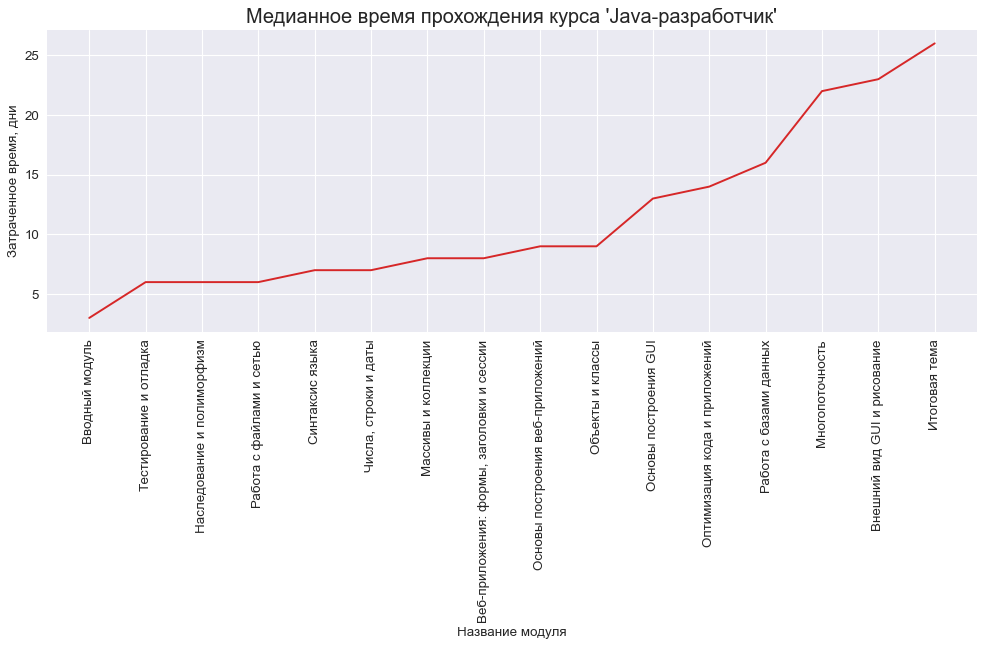

In [93]:
# Import Data
df = hw_duration_median.loc[hw_duration_median['course_title'] == 'Java-разработчик']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('module_title', 'duration_days', data=df, color='tab:red')

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Медианное время прохождения курса 'Java-разработчик'", fontsize=18)
plt.xlabel('Название модуля', fontsize=12)
plt.ylabel('Затраченное время, дни', fontsize=12)

Text(0, 0.5, 'Затраченное время, дни')

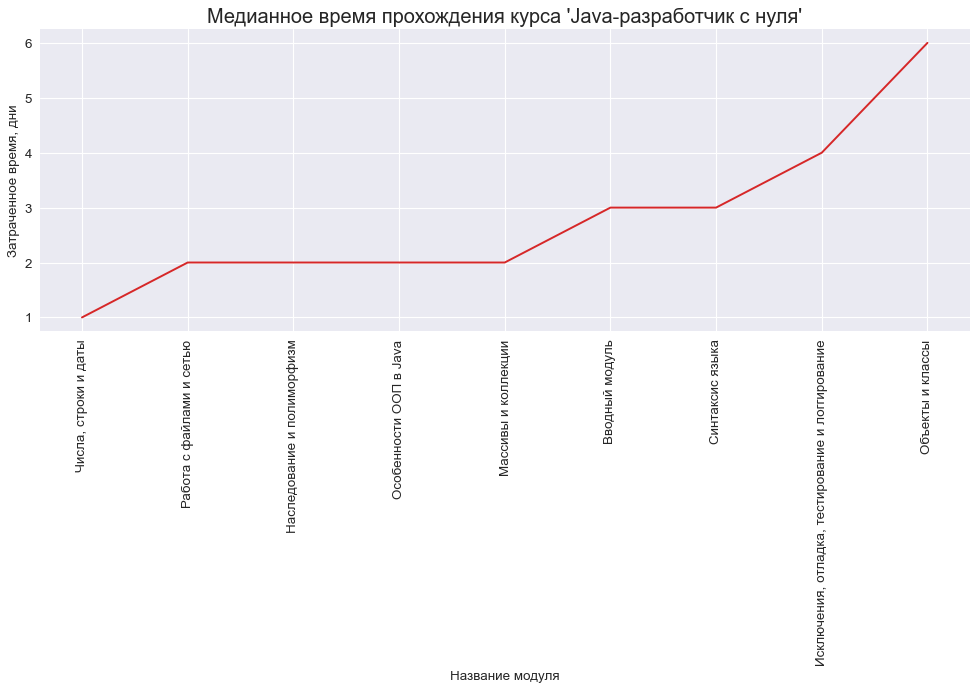

In [94]:
# Import Data
df = hw_duration_median.loc[hw_duration_median['course_title'] == 'Java-разработчик c нуля']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('module_title', 'duration_days', data=df, color='tab:red')

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Медианное время прохождения курса 'Java-разработчик c нуля'", fontsize=18)
plt.xlabel('Название модуля', fontsize=12)
plt.ylabel('Затраченное время, дни', fontsize=12)

Text(0, 0.5, 'Затраченное время, дни')

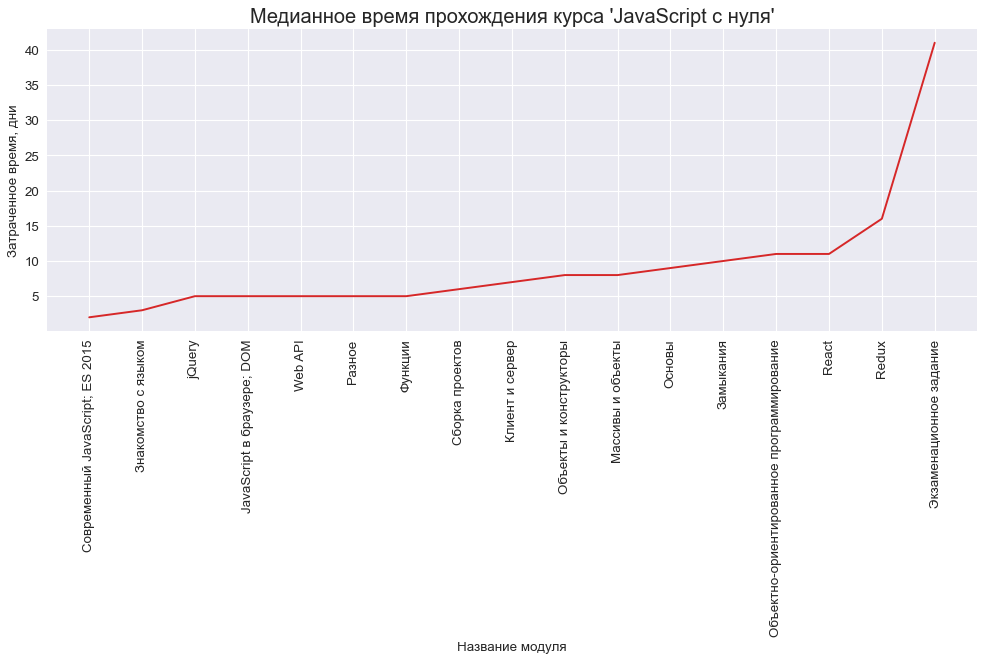

In [95]:
# Import Data
df = hw_duration_median.loc[hw_duration_median['course_title'] == 'JavaScript с нуля']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('module_title', 'duration_days', data=df, color='tab:red')

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Медианное время прохождения курса 'JavaScript с нуля'", fontsize=18)
plt.xlabel('Название модуля', fontsize=12)
plt.ylabel('Затраченное время, дни', fontsize=12)

Text(0, 0.5, 'Затраченное время, дни')

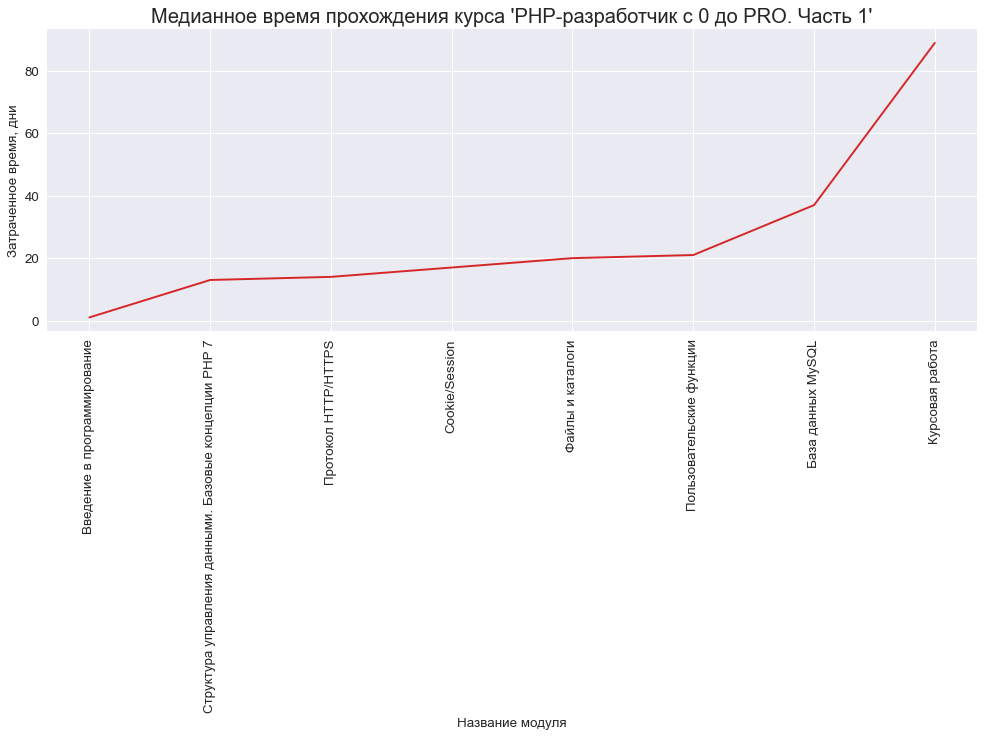

In [96]:
# Import Data
df = hw_duration_median.loc[hw_duration_median['course_title'] == 'PHP-разработчик с 0 до PRO. Часть 1']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('module_title', 'duration_days', data=df, color='tab:red')

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Медианное время прохождения курса 'PHP-разработчик с 0 до PRO. Часть 1'", fontsize=18)
plt.xlabel('Название модуля', fontsize=12)
plt.ylabel('Затраченное время, дни', fontsize=12)

Text(0, 0.5, 'Затраченное время, дни')

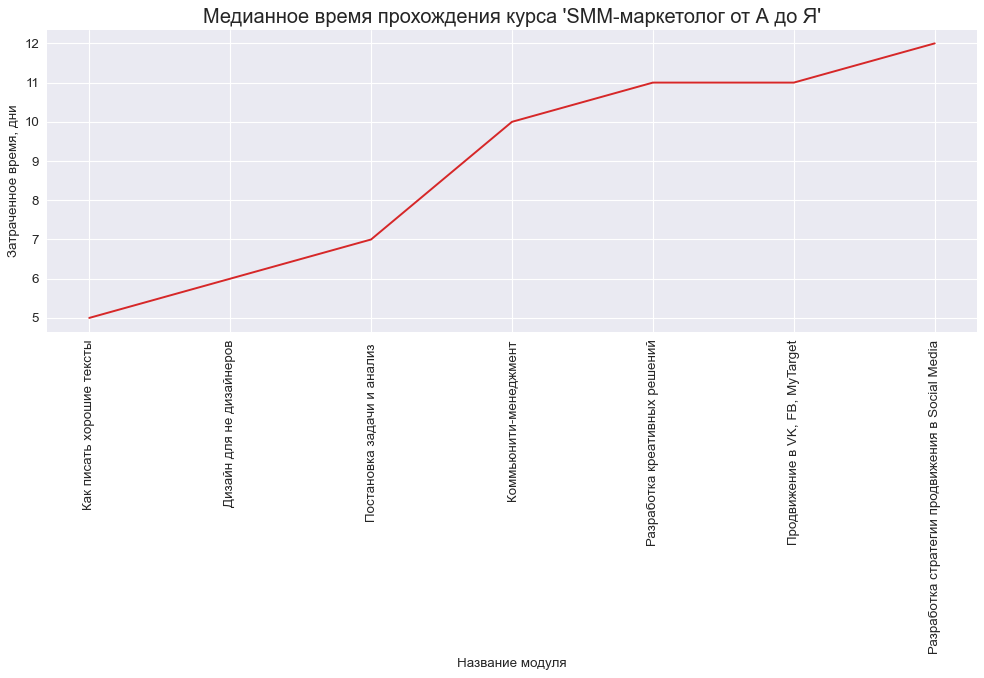

In [97]:
# Import Data
df = hw_duration_median.loc[hw_duration_median['course_title'] == 'SMM-маркетолог от А до Я']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('module_title', 'duration_days', data=df, color='tab:red')

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Медианное время прохождения курса 'SMM-маркетолог от А до Я'", fontsize=18)
plt.xlabel('Название модуля', fontsize=12)
plt.ylabel('Затраченное время, дни', fontsize=12)

Text(0, 0.5, 'Затраченное время, дни')

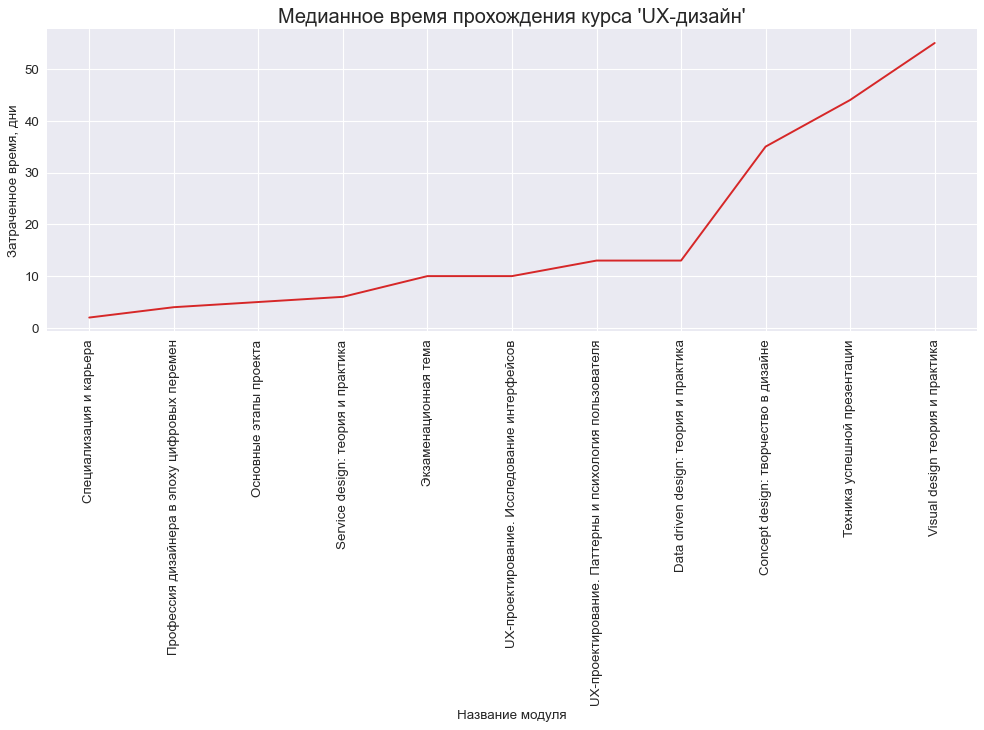

In [98]:
# Import Data
df = hw_duration_median.loc[hw_duration_median['course_title'] == 'UX-дизайн']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('module_title', 'duration_days', data=df, color='tab:red')

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Медианное время прохождения курса 'UX-дизайн'", fontsize=18)
plt.xlabel('Название модуля', fontsize=12)
plt.ylabel('Затраченное время, дни', fontsize=12)

Text(0, 0.5, 'Затраченное время, дни')

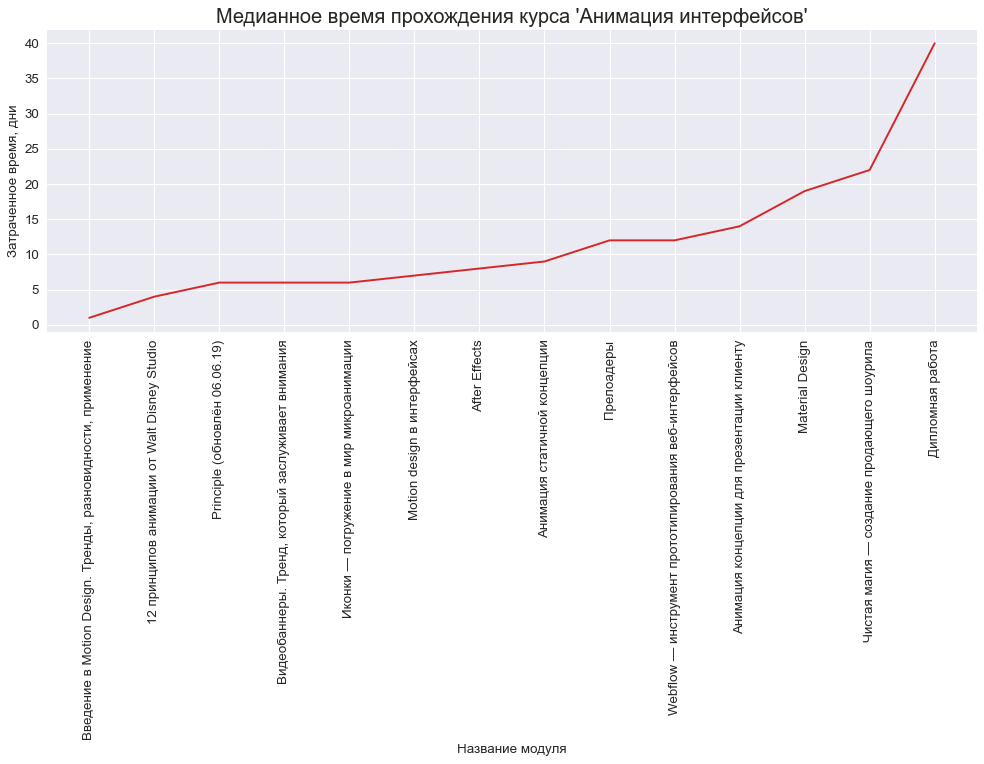

In [99]:
# Import Data
df = hw_duration_median.loc[hw_duration_median['course_title'] == 'Анимация интерфейсов']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('module_title', 'duration_days', data=df, color='tab:red')

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Медианное время прохождения курса 'Анимация интерфейсов'", fontsize=18)
plt.xlabel('Название модуля', fontsize=12)
plt.ylabel('Затраченное время, дни', fontsize=12)

Text(0, 0.5, 'Затраченное время, дни')

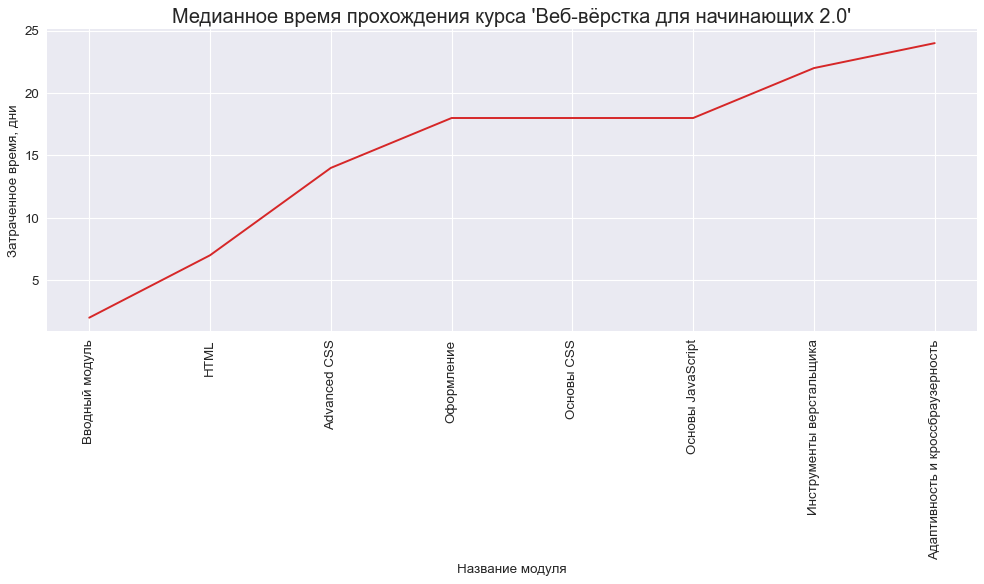

In [100]:
# Import Data
df = hw_duration_median.loc[hw_duration_median['course_title'] == 'Веб-вёрстка для начинающих 2.0']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('module_title', 'duration_days', data=df, color='tab:red')

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Медианное время прохождения курса 'Веб-вёрстка для начинающих 2.0'", fontsize=18)
plt.xlabel('Название модуля', fontsize=12)
plt.ylabel('Затраченное время, дни', fontsize=12)

Text(0, 0.5, 'Затраченное время, дни')

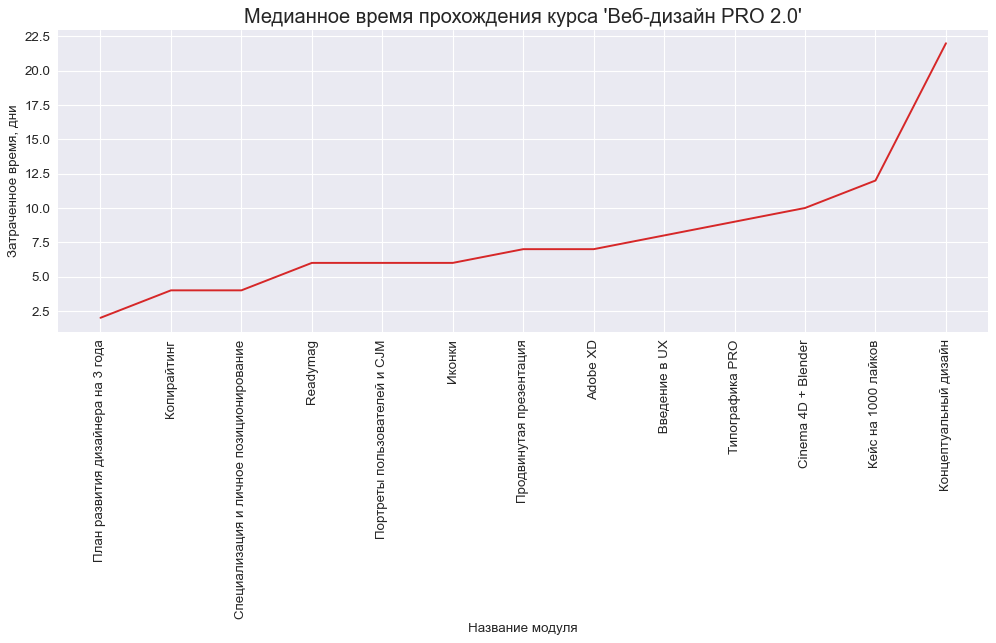

In [101]:
# Import Data
df = hw_duration_median.loc[hw_duration_median['course_title'] == 'Веб-дизайн PRO 2.0']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('module_title', 'duration_days', data=df, color='tab:red')

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Медианное время прохождения курса 'Веб-дизайн PRO 2.0'", fontsize=18)
plt.xlabel('Название модуля', fontsize=12)
plt.ylabel('Затраченное время, дни', fontsize=12)

Text(0, 0.5, 'Затраченное время, дни')

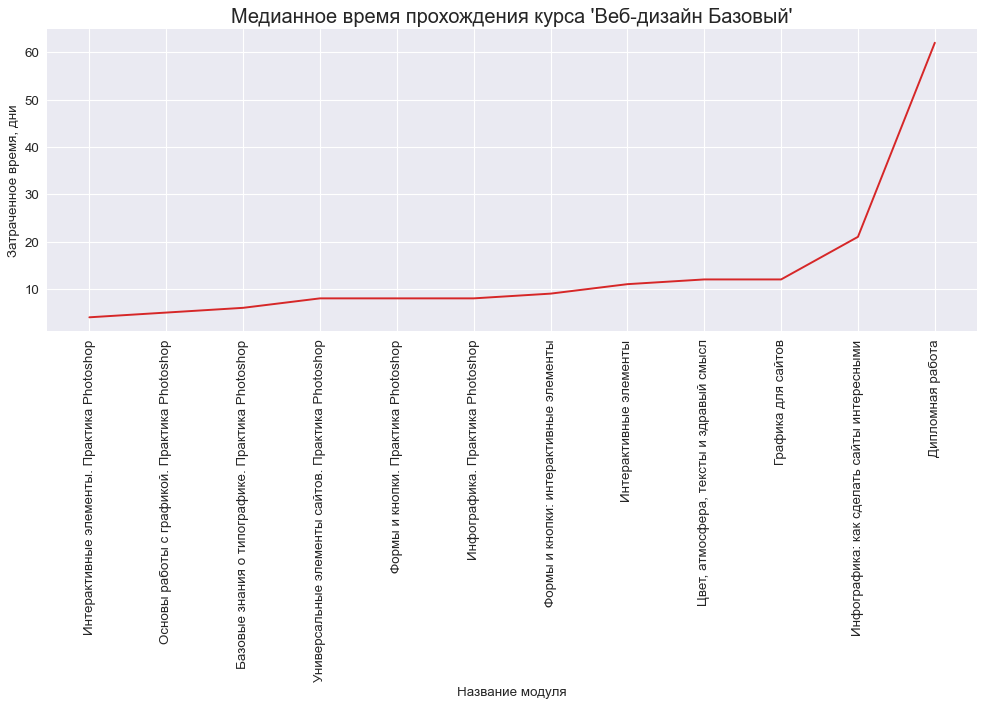

In [102]:
# Import Data
df = hw_duration_median.loc[hw_duration_median['course_title'] == 'Веб-дизайн Базовый']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('module_title', 'duration_days', data=df, color='tab:red')

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Медианное время прохождения курса 'Веб-дизайн Базовый'", fontsize=18)
plt.xlabel('Название модуля', fontsize=12)
plt.ylabel('Затраченное время, дни', fontsize=12)

Text(0, 0.5, 'Затраченное время, дни')

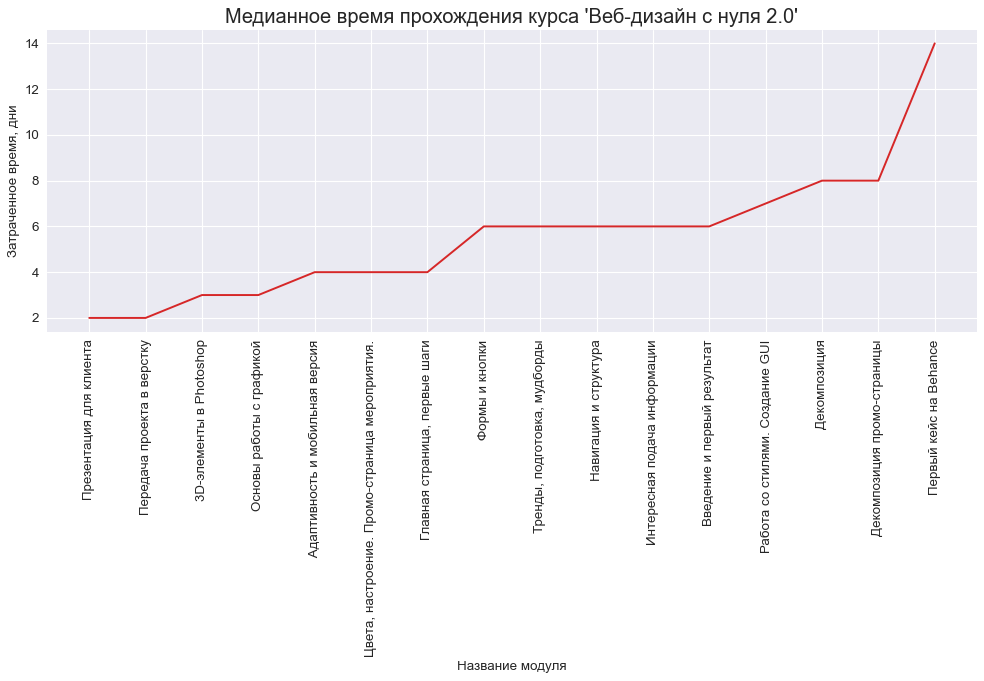

In [103]:
# Import Data
df = hw_duration_median.loc[hw_duration_median['course_title'] == 'Веб-дизайн с нуля 2.0']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('module_title', 'duration_days', data=df, color='tab:red')

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Медианное время прохождения курса 'Веб-дизайн с нуля 2.0'", fontsize=18)
plt.xlabel('Название модуля', fontsize=12)
plt.ylabel('Затраченное время, дни', fontsize=12)

Text(0, 0.5, 'Затраченное время, дни')

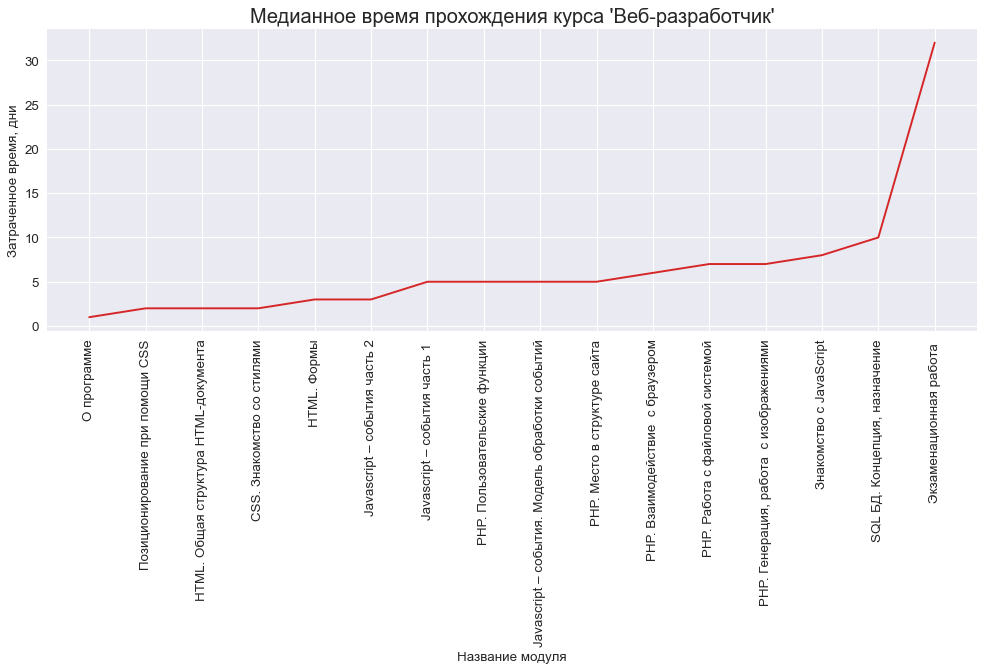

In [104]:
# Import Data
df = hw_duration_median.loc[hw_duration_median['course_title'] == 'Веб-разработчик']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('module_title', 'duration_days', data=df, color='tab:red')

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Медианное время прохождения курса 'Веб-разработчик'", fontsize=18)
plt.xlabel('Название модуля', fontsize=12)
plt.ylabel('Затраченное время, дни', fontsize=12)

Text(0, 0.5, 'Затраченное время, дни')

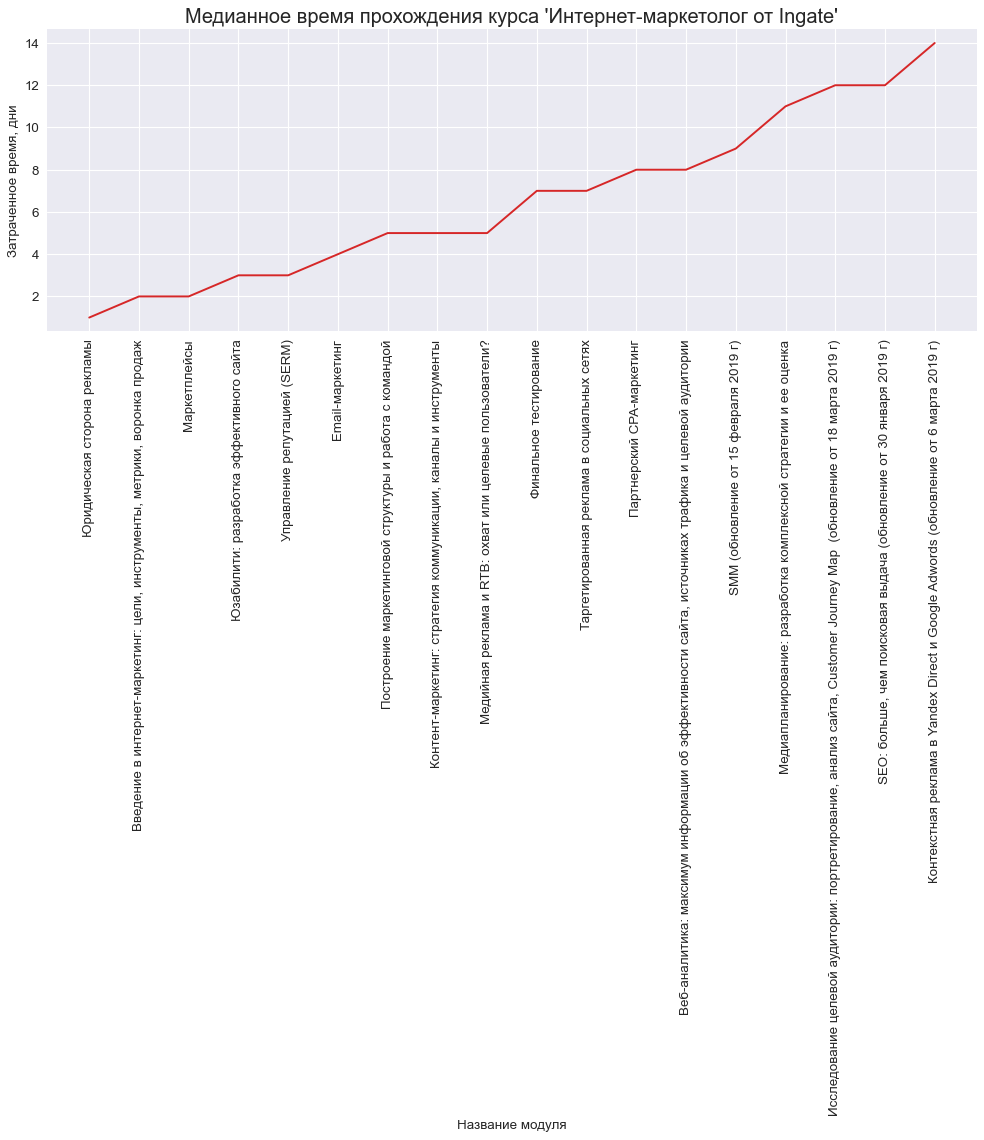

In [105]:
# Import Data
df = hw_duration_median.loc[hw_duration_median['course_title'] == 'Интернет-маркетолог от Ingate']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('module_title', 'duration_days', data=df, color='tab:red')

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Медианное время прохождения курса 'Интернет-маркетолог от Ingate'", fontsize=18)
plt.xlabel('Название модуля', fontsize=12)
plt.ylabel('Затраченное время, дни', fontsize=12)

Text(0, 0.5, 'Затраченное время, дни')

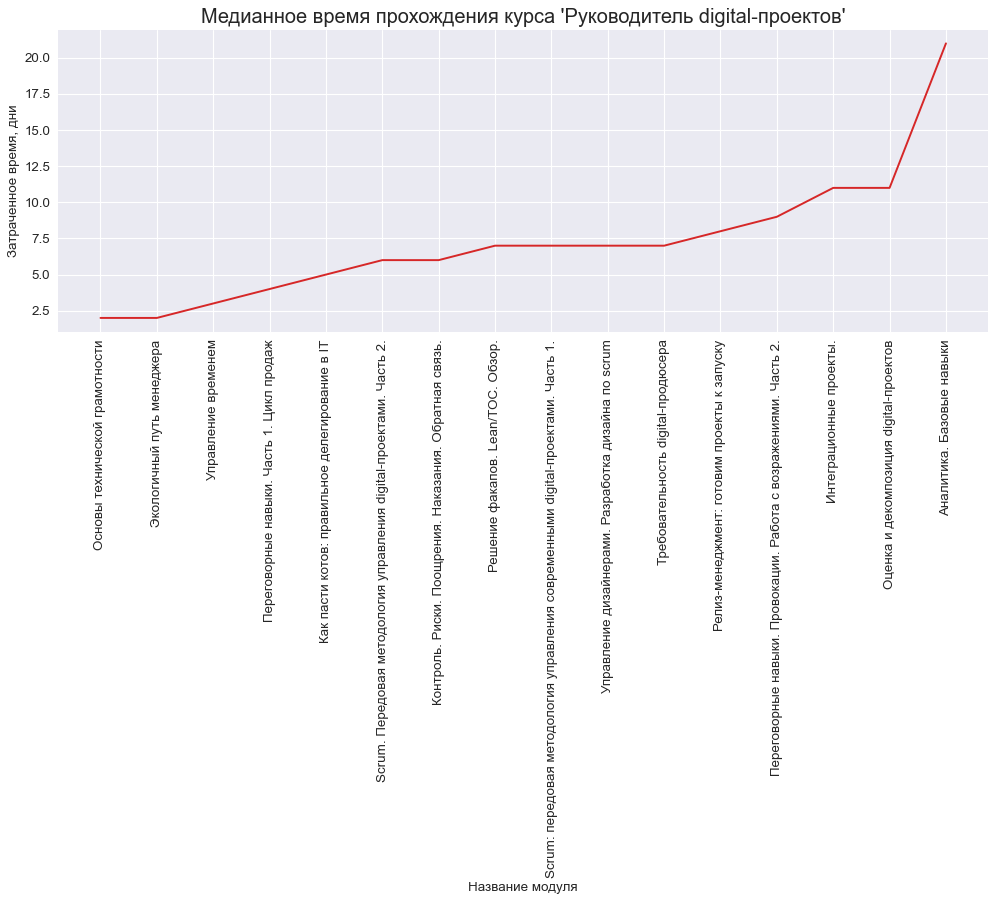

In [106]:
# Import Data
df = hw_duration_median.loc[hw_duration_median['course_title'] == 'Руководитель digital-проектов']

# Draw Plot
plt.figure(figsize=(15,5), dpi= 80)
plt.plot('module_title', 'duration_days', data=df, color='tab:red')

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Медианное время прохождения курса 'Руководитель digital-проектов'", fontsize=18)
plt.xlabel('Название модуля', fontsize=12)
plt.ylabel('Затраченное время, дни', fontsize=12)

# Ответ на п. 3.3<br>
Чтобы выявить сезонность, посчитаем медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса.

In [107]:
# Извлекаем столбцы "Дата начала" и "Дата конца"
start_date_col = h_w_done['start_date']
end_date_col = h_w_done['finish_date']
date_ranges = []
for start_date, end_date in zip(start_date_col, end_date_col):
  date_ranges.append(pd.date_range(start_date, end_date))

# Добавляем новый столбец с диапазонами дат
h_w_done['date_range'] = date_ranges

In [108]:
h_w_done

course_id  module_number  \
980     04ba6d0b40670c43a209141fa01fa784              1   
981     04ba6d0b40670c43a209141fa01fa784              1   
982     04ba6d0b40670c43a209141fa01fa784              1   
983     04ba6d0b40670c43a209141fa01fa784              1   
984     04ba6d0b40670c43a209141fa01fa784              1   
...                                  ...            ...   
350669  e9bb9205eeed307ee7cbaa08bfd166c3             18   
350670  e9bb9205eeed307ee7cbaa08bfd166c3             18   
350672  e9bb9205eeed307ee7cbaa08bfd166c3             18   
350673  e9bb9205eeed307ee7cbaa08bfd166c3             18   
350676  e9bb9205eeed307ee7cbaa08bfd166c3             18   

                                             module_title  lesson_number  \
980     Введение в Motion Design. Тренды, разновидност...              3   
981     Введение в Motion Design. Тренды, разновидност...              3   
982     Введение в Motion Design. Тренды, разновидност...              3   
983     Введение в Motion Design. Тренды, разновидност...              3   
984     Введение в Motion Design. Тренды, разновидност...              3   
...                                                   ...            ...   
350669                            Экзаменационное задание              1   
350670                            Экзаменационное задание              1   
350672                            Экзаменационное задание              1   
350673                            Экзаменационное задание              1   
350676                            Экзаменационное задание              1   

                  lesson_title                          lesson_token  \
980            Домашняя работа  c4377574-d117-45c7-8da5-dd7d1923517d   
981            Домашняя работа  c4377574-d117-45c7-8da5-dd7d1923517d   
982            Домашняя работа  c4377574-d117-45c7-8da5-dd7d1923517d   
983            Домашняя работа  c4377574-d117-45c7-8da5-dd7d1923517d   
984            Домашняя работа  c4377574-d117-45c7-8da5-dd7d1923517d   
...                        ...                                   ...   
350669  Экзаменационная работа  c2393457-b95e-46ac-b2c7-cd9b7d5f8ba4   
350670  Экзаменационная работа  c2393457-b95e-46ac-b2c7-cd9b7d5f8ba4   
350672  Экзаменационная работа  c2393457-b95e-46ac-b2c7-cd9b7d5f8ba4   
350673  Экзаменационная работа  c2393457-b95e-46ac-b2c7-cd9b7d5f8ba4   
350676  Экзаменационная работа  c2393457-b95e-46ac-b2c7-cd9b7d5f8ba4   

        is_video  is_homework          course_title        field  \
980        False         True  Анимация интерфейсов       Design   
981        False         True  Анимация интерфейсов       Design   
982        False         True  Анимация интерфейсов       Design   
983        False         True  Анимация интерфейсов       Design   
984        False         True  Анимация интерфейсов       Design   
...          ...          ...                   ...          ...   
350669     False         True     JavaScript с нуля  Development   
350670     False         True     JavaScript с нуля  Development   
350672     False         True     JavaScript с нуля  Development   
350673     False         True     JavaScript с нуля  Development   
350676     False         True     JavaScript с нуля  Development   

                             progress_id status  \
980     c29cf5d7f832d3e82f99a118223eb729   done   
981     b431e4ed2a994d9a8435553c52967ffe   done   
982     611adeffa3b1c685f061d84bb34a4c16   done   
983     0029682bdb5be81e3bc3966ab728cf0c   done   
984     1a2ebe5028779875d5184be082048ee3   done   
...                                  ...    ...   
350669  f80caff0f62a5e28e2f8942757f5b004   done   
350670  f7b7722e357c85d5ceeb0c1dcac59d72   done   
350672  5c002cb09fed4ee2c24f36ebee4992d9   done   
350673  065262d4558c46a866de90a5533e710f   done   
350676  193b32f077b9f1c8fbec593e8065afcf   done   

                             start_date                      finish_date  \
980    2018-09-01 11:41:39.358335+00:0

In [109]:
seasoning_df = h_w_done.explode('date_range')

In [110]:
seasoning_df['date_period'] = seasoning_df['date_range'].dt.to_period('M')

<ipython-input-110-9fb08f566720>:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  seasoning_df['date_period'] = seasoning_df['date_range'].dt.to_period('M')


In [111]:
seasoning_df = seasoning_df[['course_title', 'field', 'duration_days', 'date_period']]

In [112]:
# способ переименовать дату с типом данных timeperiod в название месяца
#seasoning_df['month_name'] = seasoning_df['date_range'].dt.strftime('%B')

In [113]:
seasoning_df = seasoning_df.rename(columns={'duration_days': 'median_duration_days'})

In [114]:
seasoning_df = seasoning_df.groupby(['course_title', 'date_period'])['median_duration_days'].median().reset_index()

# Преобразовываем значения в целые числа
#seasoning_df['median_duration_days'] = seasoning_df['median_duration_days'].astype(int)

# меняем тип данных с period на datetime
seasoning_df['date_period'] = seasoning_df['date_period'].astype('str')
seasoning_df['date_period'] = seasoning_df['date_period'].astype('datetime64[ns]')

In [115]:
seasoning_df

course_title date_period  median_duration_days
0                    Excel Базовый  2018-02-01              0.863168
1                    Excel Базовый  2018-03-01            239.226355
2                    Excel Базовый  2018-04-01              7.991883
3                    Excel Базовый  2018-05-01             17.347428
4                    Excel Базовый  2018-06-01             96.140202
..                             ...         ...                   ...
253  Руководитель digital-проектов  2019-03-01             36.859126
254  Руководитель digital-проектов  2019-04-01             52.405932
255  Руководитель digital-проектов  2019-05-01             42.238518
256  Руководитель digital-проектов  2019-06-01             33.699978
257  Руководитель digital-проектов  2019-07-01             17.687974

[258 rows x 3 columns]

# Ответ на п. 3.4<br>
На основании третьего пункта построим line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам.

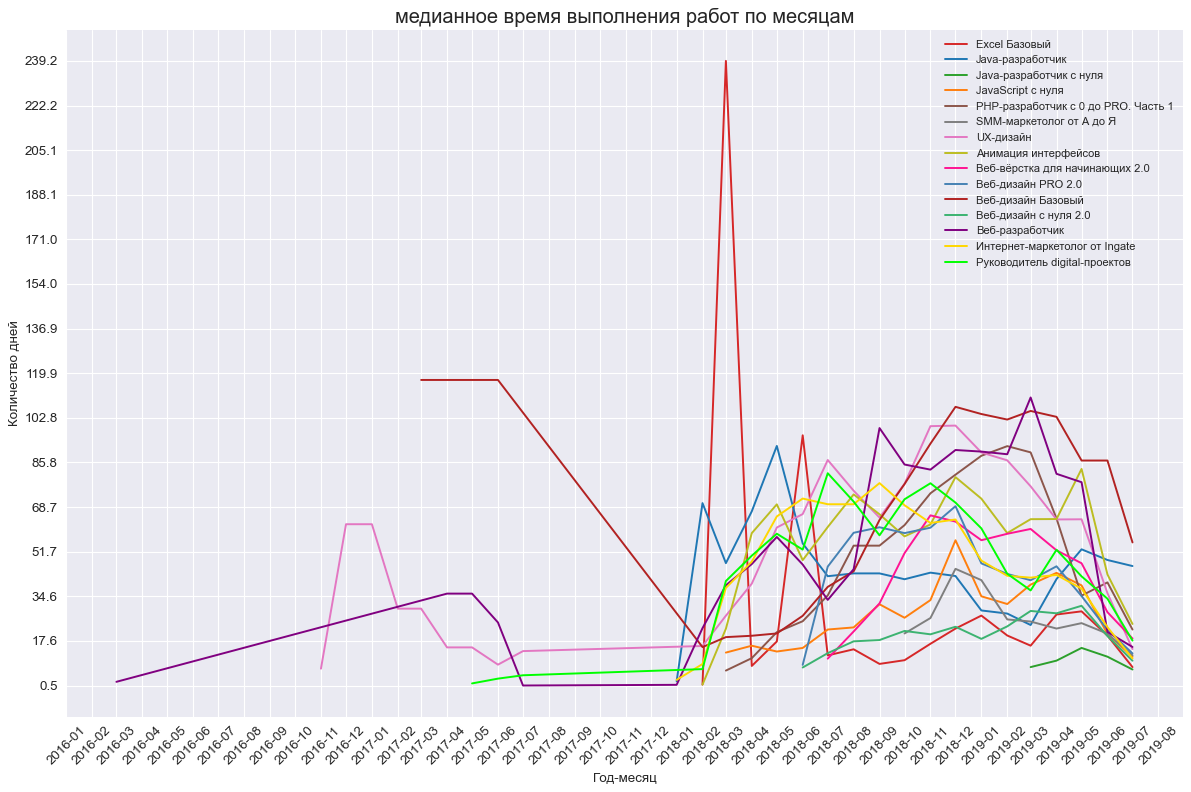

In [116]:
plt.figure(figsize=(15, 10), dpi= 80)

courses = progress_count['course_title'].unique()
color_palette = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive', 'deeppink', 'steelblue', 'firebrick', 'mediumseagreen', 'purple', 'gold', 'lime', 'coral'] 

for i, course in enumerate(courses):
    course_data = seasoning_df[seasoning_df["course_title"] == course]
    plt.plot(course_data["date_period"],
             course_data["median_duration_days"],             
             label=course,
             color=color_palette[i])

# Создем MonthLocator чтобы установить тики на начало каждого месяца
month_locator = MonthLocator()

# Устанавливаем locator для x-оси
plt.gca().xaxis.set_major_locator(month_locator)
    
plt.xticks(rotation=45, fontsize=12)

min_count = seasoning_df['median_duration_days'].min()
max_count = seasoning_df['median_duration_days'].max()
num_ticks = 15  # Устанвливаем значение количества тиков (включая min и max)
tick_values = np.linspace(min_count, max_count, num_ticks)  # Создает равномерно распределенные значения
plt.yticks(tick_values, fontsize=12)
    
plt.title("медианное время выполнения работ по месяцам", fontsize=18)
plt.ylabel('Количество дней', fontsize=12)
plt.xlabel('Год-месяц', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

Минималоное время выполнения заданий около суток, распределение от, примерно, суток до 25 дней 
Максимальное больше года - от 444 до 484 дней, при этом расперделение от 13 дней
Средние значения от 3 до 98 дней
А медианное время прохождения модуля от 1 до 89

Проанализировав графики больше дней на каждом курсе у студентов занимают модули с итоговыми контрольными заданиями, заданиями-проектами.

Наибольшее медианное время выполнения зафиксировано в марте 2018 на курсе Excel Базовый, по остальным курсам затруднения у студентов были в мае 2018, декабре 2018 и апреле 2019

## 4. Расчет конверсии

1. Посчитаем конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если ДЗ в модуле несколько, то считать по первому ДЗ в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если ДЗ в модуле несколько, то считать по последнему ДЗ в модуле).
2. Построим bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе.
3. Построим горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков.
4. На основании рассчитанных значений сделаем аналитический вывод.

# Ответ на п. 4.1<br>
Посчитаем конверсию перехода студентов из одного модуля в другой на каждом курсе.

In [118]:
# Получаем уникальные названия курсов
courses = home_work['course_title'].unique()

# Создаем пустой DataFrame для хранения результатов конверсии
conversion_rate_df = pd.DataFrame(columns=['course_title', 'field', 'module_from', 'module_to', 'module_number', 'conversion_rate'])

# Рассчитываем конверсию для каждого курса и каждой пары модулей
for course in courses:
    course_data = home_work[home_work["course_title"] == course]
    modules = course_data['module_title'].unique()
    module_num = course_data['module_number'].unique()
    for i, module in enumerate(modules):
        if i == 0:
            # Если это первый модуль в курсе, устанавливаем конверсию на 1
            conversion_rate_df = pd.concat([conversion_rate_df, pd.DataFrame({
                'course_title': course,
                'field': course_data['field'].iloc[0],
                'module_from': None,
                'module_to': module,
                'module_number': module_num[0],
                'conversion_rate': 1.0
            }, index=[0])], ignore_index=True)
        else:
            current_module_data = course_data[course_data["module_title"] == module]
            prev_module = modules[i-1]

            # Находим количество студентов, начавших работу в текущем модуле
            started_to_count = current_module_data['student_id'].nunique()

            # Находим количество студентов, полностью прошедших предыдущий модуль
            prev_module_data = course_data[course_data["module_title"] == prev_module]
            passed_from_count = prev_module_data[prev_module_data['status'] == 'done']['student_id'].nunique()

            # Рассчитываем конверсию и добавляем результат в DataFrame
            if passed_from_count != 0:
                conversion_rate = started_to_count / passed_from_count
            else:
                conversion_rate = 0  # избегаем деления на ноль
            conversion_rate_df = pd.concat([conversion_rate_df, pd.DataFrame({
                'course_title': course,
                'field': course_data['field'].iloc[0],
                'module_from': prev_module,
                'module_to': module,
                'module_number': module_num[i],
                'conversion_rate': conversion_rate
            }, index=[0])], ignore_index=True)

# Выводим результаты
conversion_rate_df


course_title        field  \
0    Анимация интерфейсов       Design   
1    Анимация интерфейсов       Design   
2    Анимация интерфейсов       Design   
3    Анимация интерфейсов       Design   
4    Анимация интерфейсов       Design   
..                    ...          ...   
186     JavaScript с нуля  Development   
187     JavaScript с нуля  Development   
188     JavaScript с нуля  Development   
189     JavaScript с нуля  Development   
190     JavaScript с нуля  Development   

                                           module_from  \
0                                                 None   
1    Введение в Motion Design. Тренды, разновидност...   
2          12 принципов анимации от Walt Disney Studio   
3                          Motion design в интерфейсах   
4                                        After Effects   
..                                                 ...   
186                                             jQuery   
187                    Современный JavaScript; ES 2015   
188                                    Сборка проектов   
189                                              React   
190                                              Redux   

                                             module_to module_number  \
0    Введение в Motion Design. Тренды, разновидност...             1   
1          12 принципов анимации от Walt Disney Studio             2   
2                          Motion design в интерфейсах             3   
3                                        After Effects             4   
4              Иконки — погружение в мир микроанимации             5   
..                                                 ...           ...   
186                    Современный JavaScript; ES 2015            13   
187                                    Сборка проектов            14   
188                                              React            15   
189                                              Redux            16   
190                            Экзаменационное задание            18   

     conversion_rate  
0           1.000000  
1           0.981949  
2           0.990826  
3           1.048611  
4           0.933333  
..               ...  
186         1.032787  
187         1.000000  
188         1.000000  
189         1.081081  
190         1.173913  

[191 rows x 6 columns]

# Ответ на п. 4.2<br>
Построим bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе.

<ipython-input-119-6642f33fb47f>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(conversion_rate_df['course_title'].unique()))
<ipython-input-119-6642f33fb47f>:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Автоматическая подгонка размеров графика


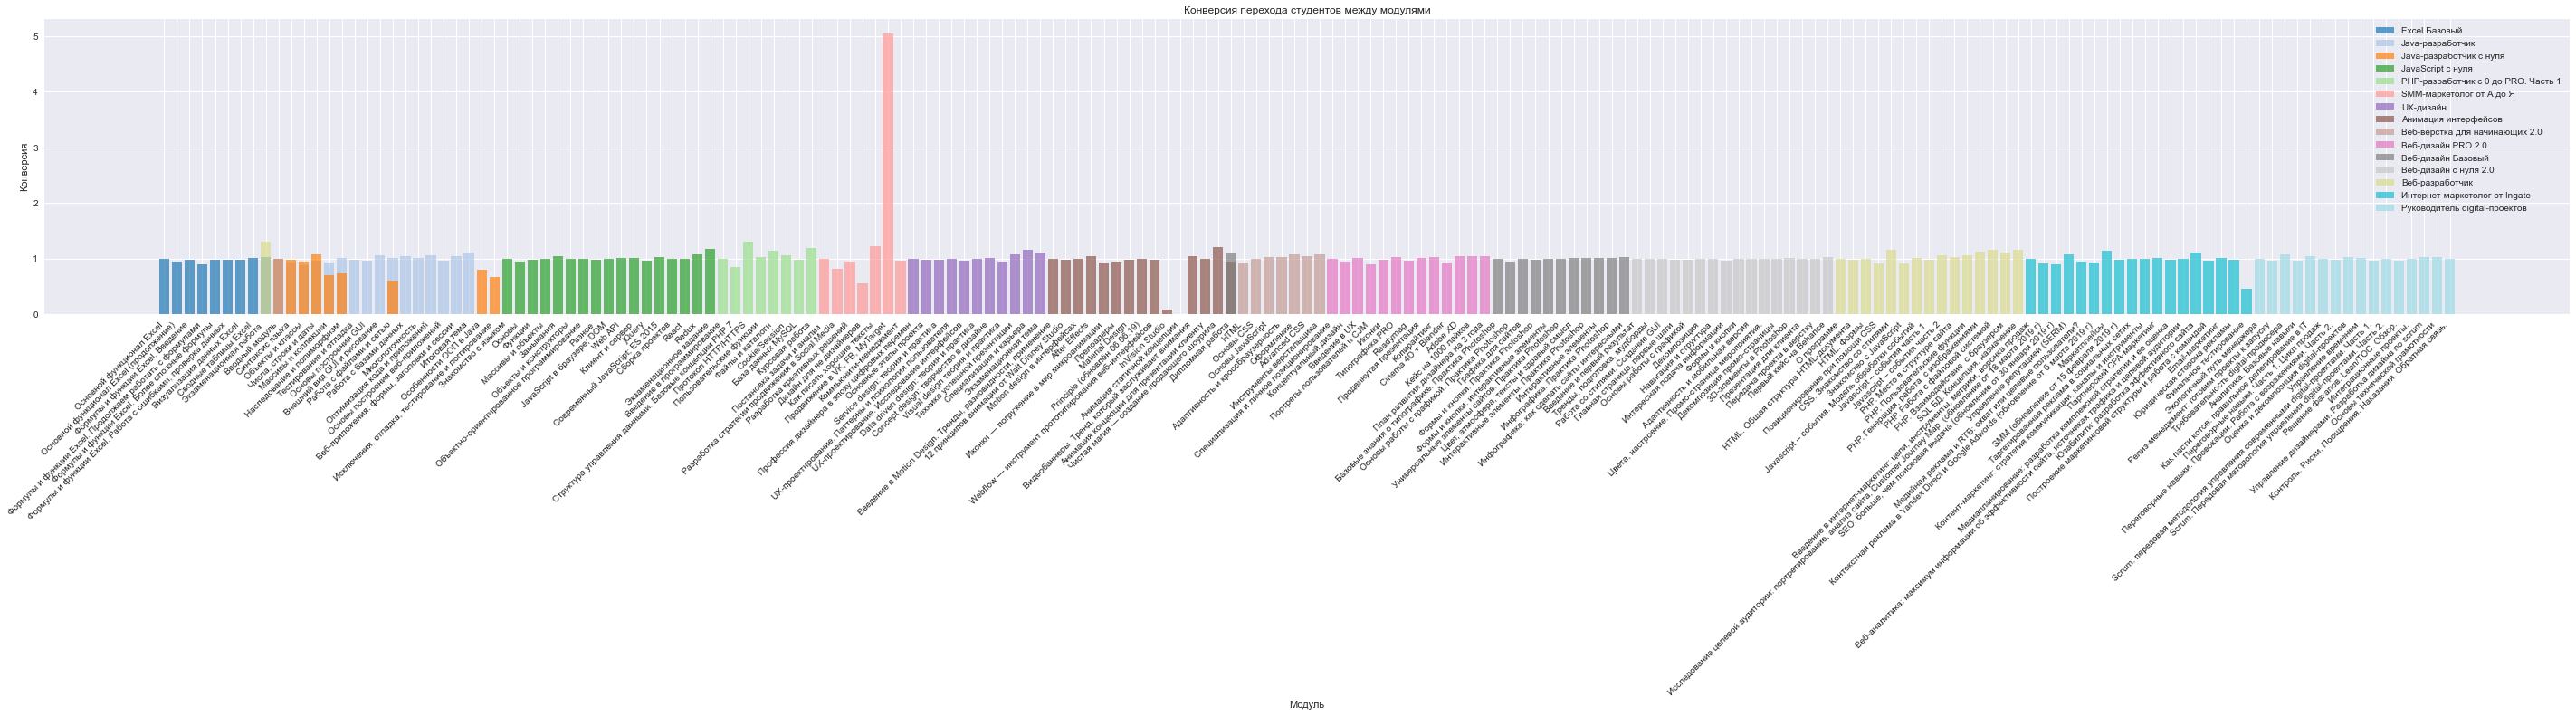

In [119]:
import matplotlib.pyplot as plt

# Группируем данные по названию курса
grouped_data = conversion_rate_df.groupby('course_title')

# Создаем график
fig, ax = plt.subplots(figsize=(50, 6))

# Цветовая палитра для разных курсов
colors = plt.cm.get_cmap('tab20', len(conversion_rate_df['course_title'].unique()))

# Цикл по группам данных и построение bar-chart
for i, (course_title, data) in enumerate(grouped_data):
    # Используем один цвет для всех модулей "from" в рамках курса
    ax.bar(data['module_to'], data['conversion_rate'], alpha=0.7, label=course_title, color=colors(i))

# Настройка графика
ax.set_title('Конверсия перехода студентов между модулями')
ax.set_xlabel('Модуль')
ax.set_ylabel('Конверсия')
ax.legend()
plt.xticks(rotation=45, ha='right')  # Поворот ticks для читаемости
plt.tight_layout()  # Автоматическая подгонка размеров графика

# Показать график
plt.show()

# Ответ на п. 4.3<br>
Построим горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков.

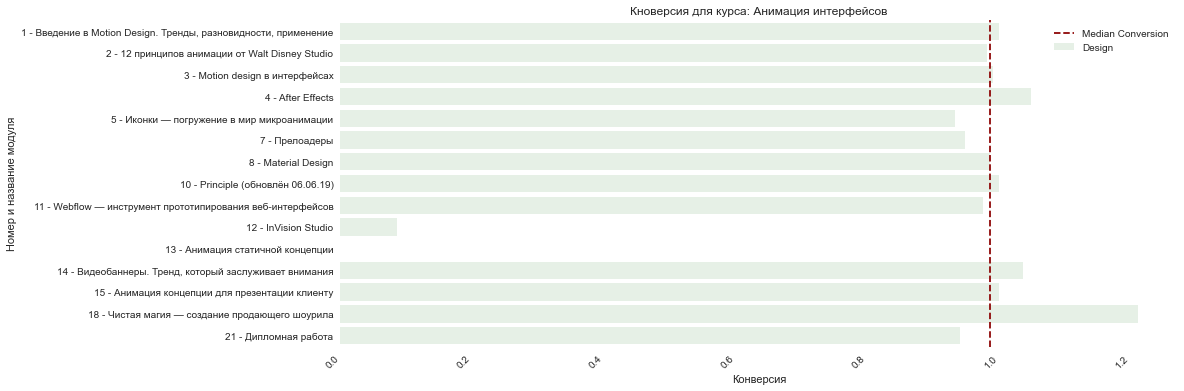

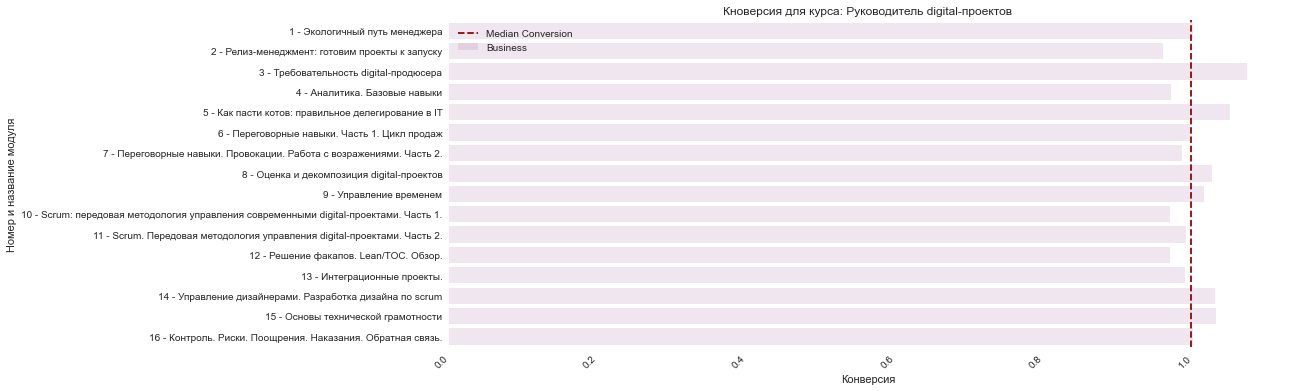

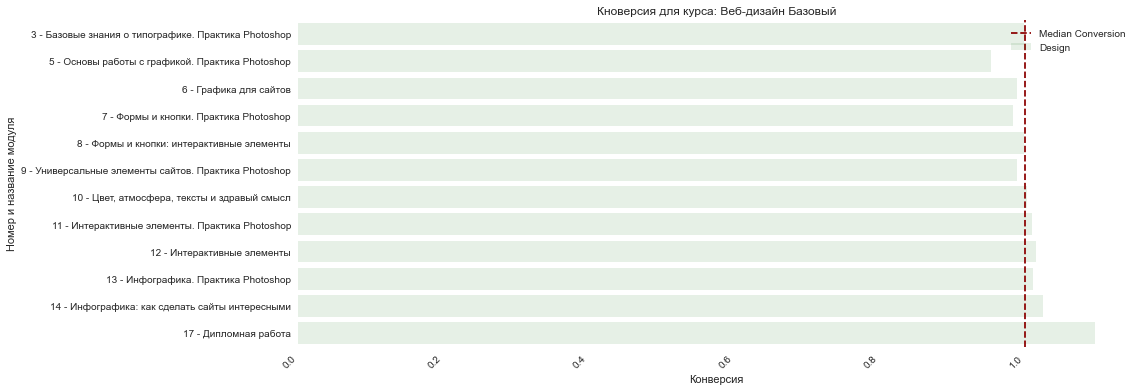

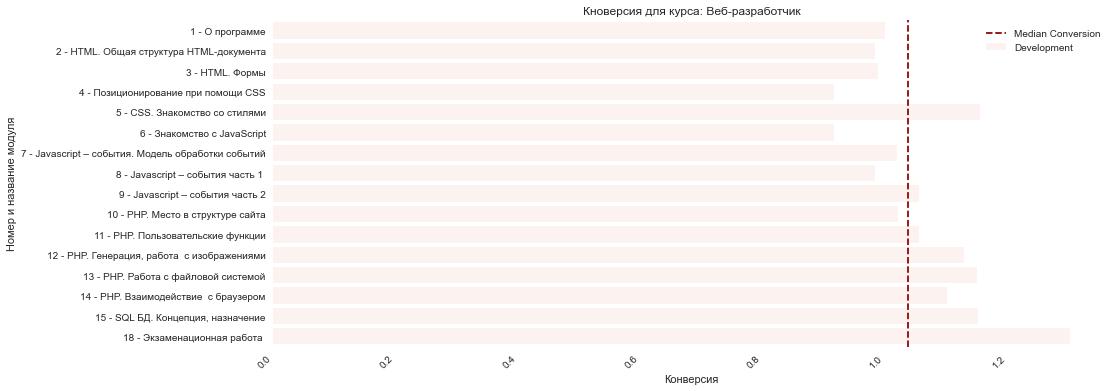

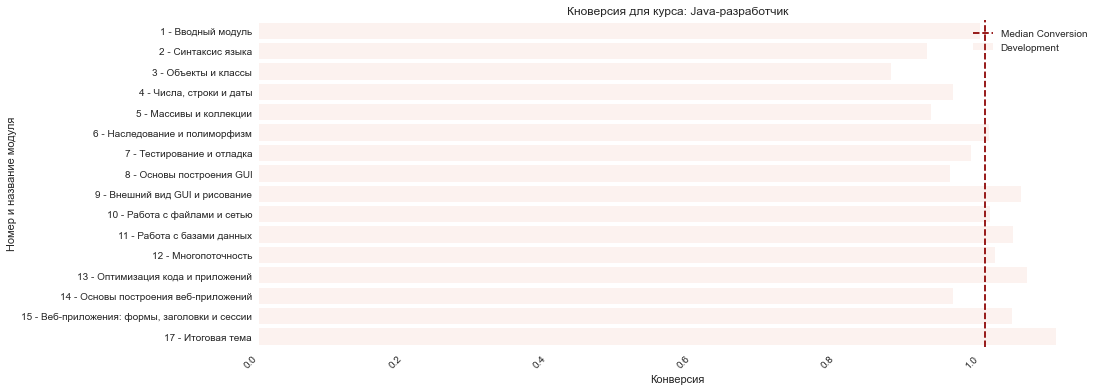

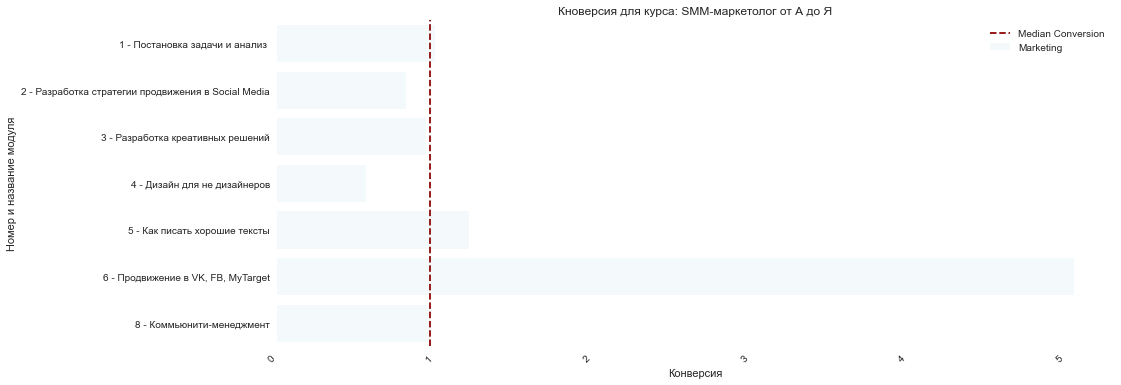

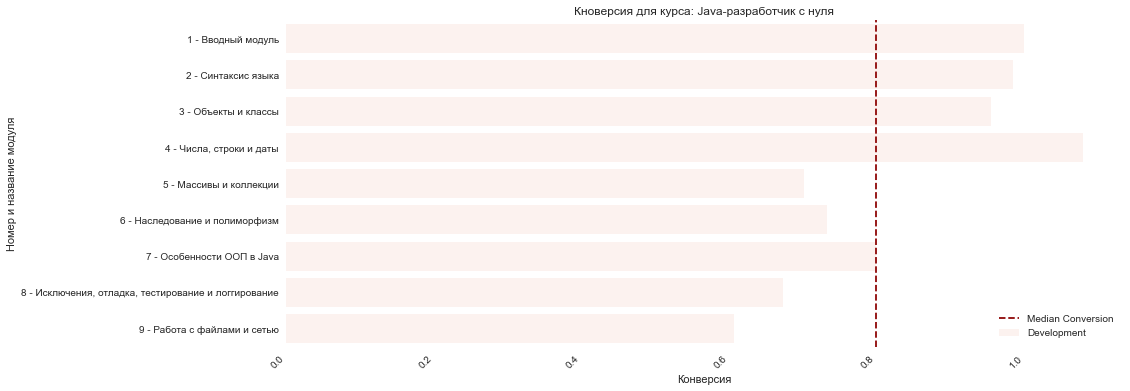

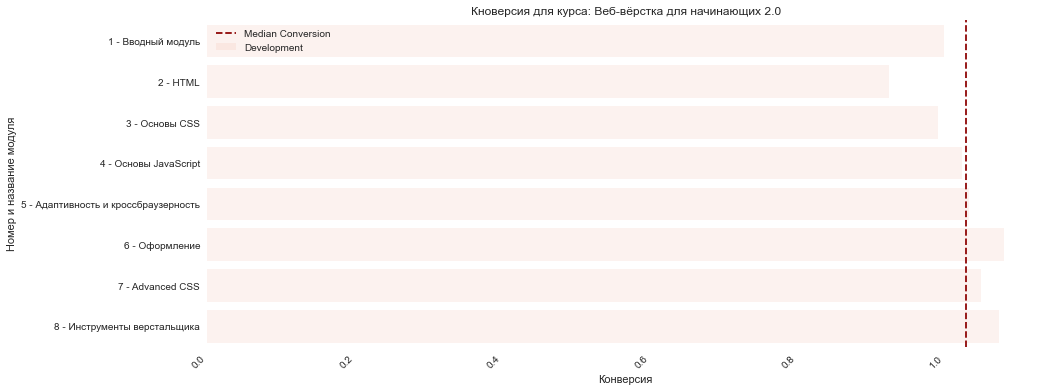

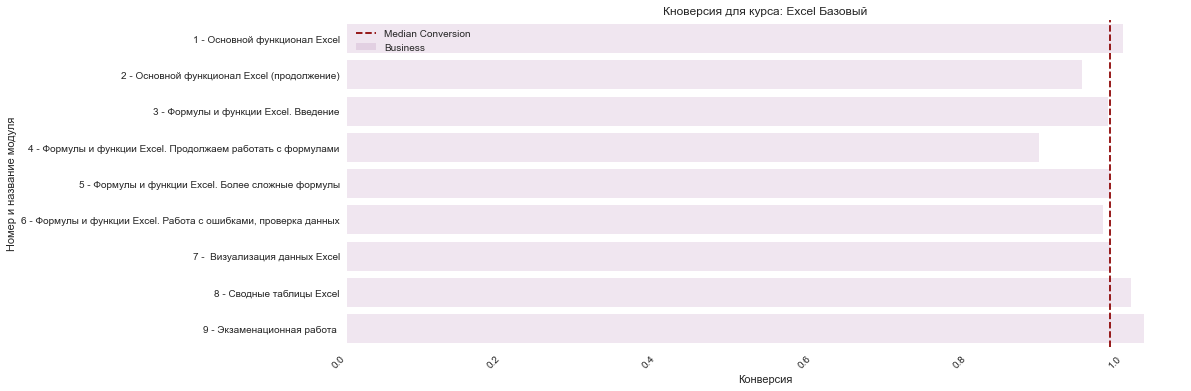

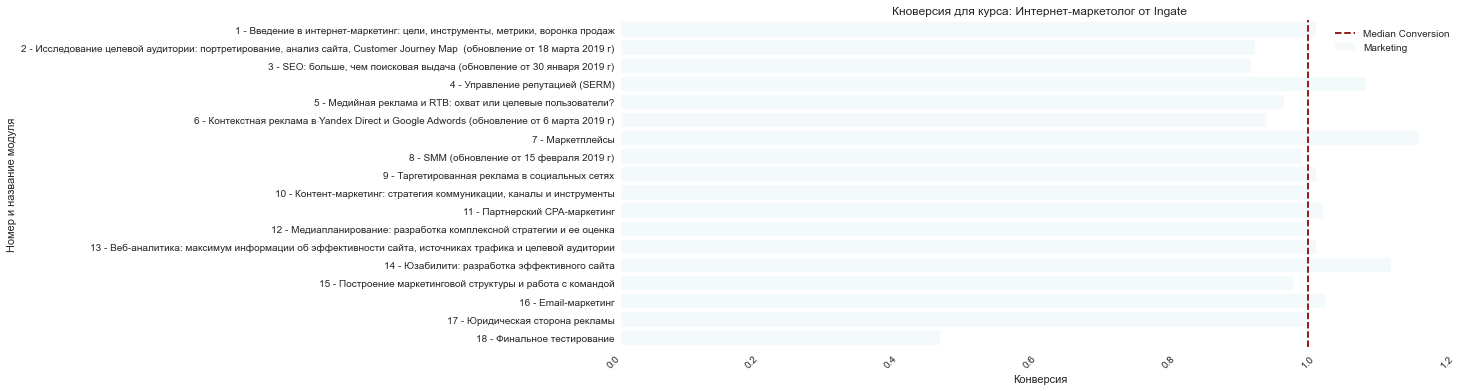

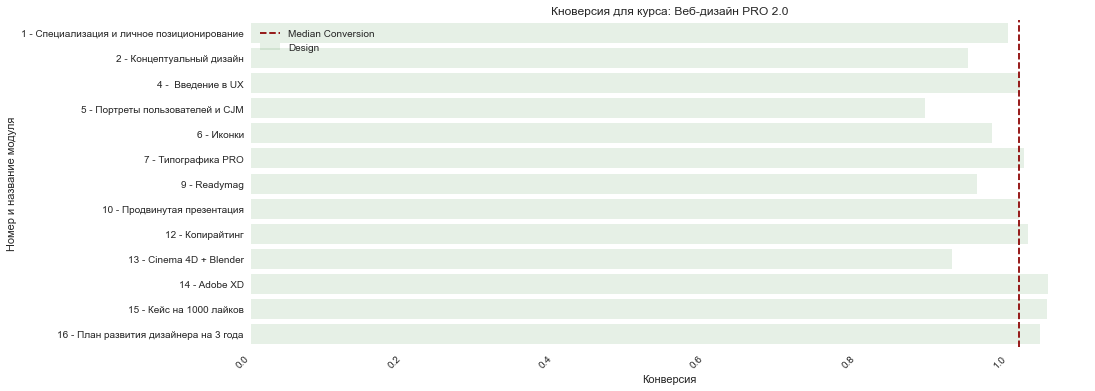

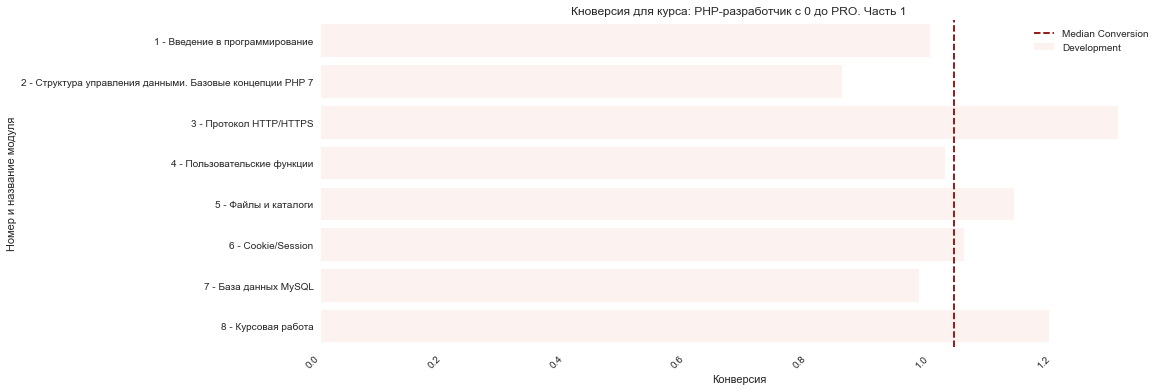

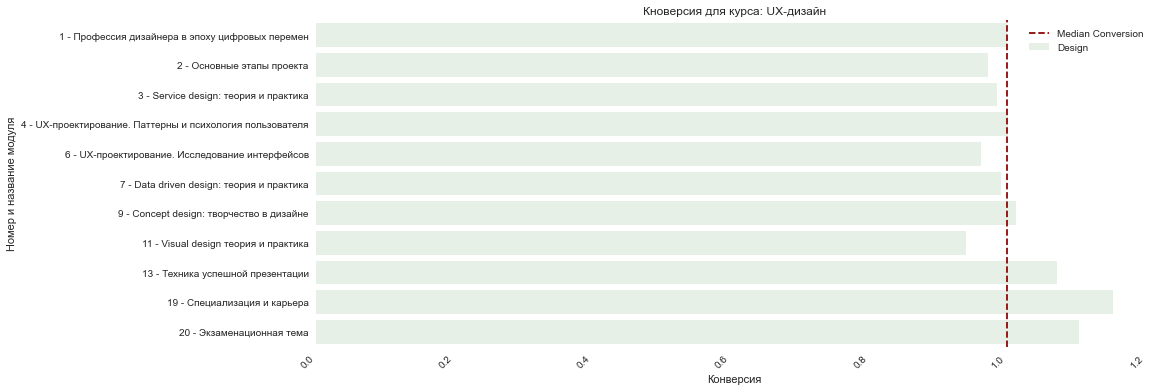

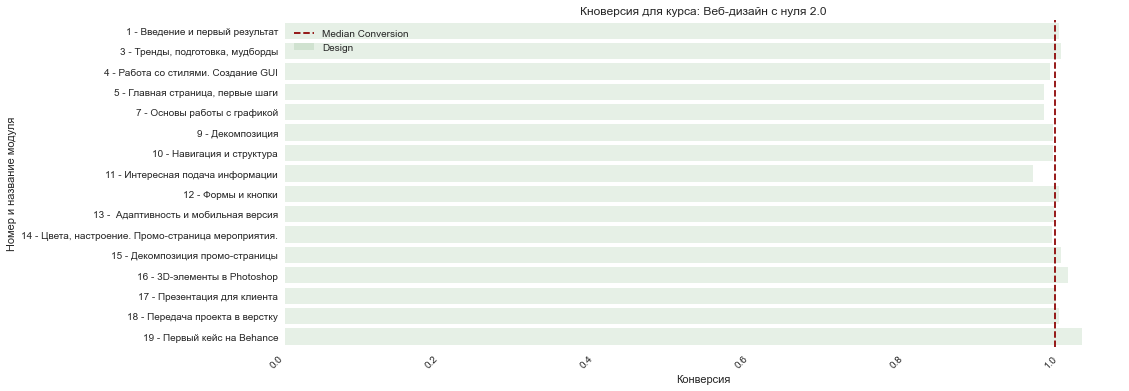

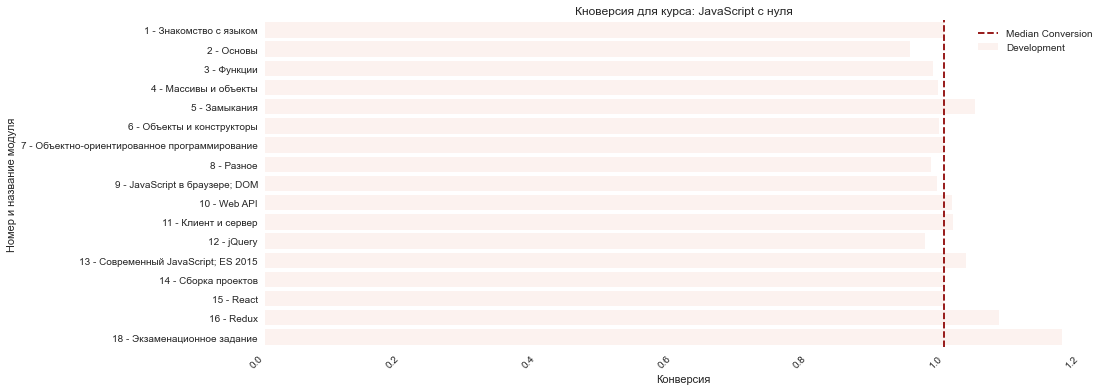

In [120]:
# Задаем стиль для графиков
sns.set_style("white")

# Задаем палитру для сфер
field_palette = {
    "Marketing": "skyblue",
    "Development": "coral",
    "Design": "green",
    "Business": "purple"
}

# Итреируемся по курсам и строим отдельные bar-chart
for course_title in conversion_rate_df['course_title'].unique():
    course_data = conversion_rate_df[conversion_rate_df['course_title'] == course_title]

    # Высчитываем величину конверсии для курса
    median_conversion = course_data['conversion_rate'].median()

    # Создаем bar chart
    plt.figure(figsize=(15, 6))
    ax = sns.barplot(
        x='conversion_rate', 
        y='module_number', 
        hue='field', 
        data=course_data, 
        orient='h', 
        alpha=0.1, # прозрачность
        palette=field_palette
    )

    # Добавляем линию медианы
    plt.axvline(median_conversion, color='darkred', linestyle='--', label='Median Conversion')

    # задаем детали графика
    plt.title(f"Кноверсия для курса: {course_title}")
    plt.xlabel("Конверсия")
    plt.ylabel("Номер и название модуля")
    plt.xticks(rotation=45, ha='right')  
    plt.legend()  # Легенда для сфер курсов
    plt.grid(False)  # Убираем сетку
    plt.box(False)  # Убираем гарницы

    # Устанавливаем мтеки для оси Х с номером и названием модуля
    ax.set_yticklabels([f"{num} - {title}" for num, title in zip(course_data['module_number'], course_data['module_to'])])

    plt.show()

Интерес для исследования представляют результаты ответа на п.4.3, далее делается допущение, что все данные для расчета конверсии верны, если прямо не оговорено обратное.

- На курсе **Анимация интерфейсов** очень маленькая конверсия у модуля *12-Invision Studio*: модуль *11-Webflow — инструмент прототипирования веб-интерфейсов'* либо оказался слишком сложным, либо неинтересным; тоже харктерно и для *12-го* из-за чего никто не перешел в модуль *13-Анимация статичной концепции*. Однако наболюдается всплеск в модуле *18-Чистая магия — cоздание продающего шоурила*
- На курсах: **'Руководитель digital-проектов', 'Веб-дизайн Базовый', 'Веб-разработчик', 'Java-разработчик'** особых экстремум нет
- На курсе **'SMM-маркетолог от А до Я'** наблюдается огромная конверсия в ~500% на модуле *'Продвижение в VK, FB, MyTarget'*, если учесть, что это не ошибка в данных, то данный модуль является крайне интересным по отношению ко всему курсу у студентов.
- На курсе **'Java-разработчик c нуля'** есть стабильно высокая конверсия на начальных 3-х модулях и сильный спад к последним 5-ти, особоненно последнему, что может говорить о низкой начальной подготовке, недостаточно проработанной программе курса, завышающей порог входа.
- На курсах: **'Веб-вёрстка для начинающих 2.0', 'Excel Базовый'** особых экстремум нет
- На курсе **'Интернет-маркетолог от Ingate'** рост относительно медианы на модулях 7 и 14, возможно из-за их практической направленности
- На остальных курсах экстермум нет
Можно проследить общую тенденцию к высокой относительно медианы конверсии на последнем и предпоследнем модуле, это говорит о том, что студенты, дошедшие до конечных модулей стремятся завершить итоговый курс и пройти экзамен. Также хочется сказать, что отсутствует четкое линейное уменьшение конверсии на всех курсах, что может свидетельствовать о грамотно построенных курсах, при котором студены сохраняют мотивацию и достаточно овладевают материалом для перехода на следующий модуль

## 5. Метрика успеваемости 


1. Периоды выполненния заданий. Судя по кол-ву студентов начавших выполнять первое Д/З студенты склонны начинать и/или прододжать обучение под новый год и на новогодние каникулы, также в майские праздники и с началом учебного года в сентябре. Это связано с наличием большого кол-ва свободного времени и желанием "начать жить по-новому". По этому слоедует стимулировать студентов рассылкой материалов "как лучше учиться", спрашивать все ли у них получается, каие трудности, как они думают их преодолеть, дать советы от кураторов.
2. Время выполнения заданий. Некоторые студенты очень много времени тратят на выполнение заданий, некоторые более года. Рекомендуется обращать на это внимание кураторов и связываться со студентами
